# Lab 1 - Pytorch Models and Training

**Name**:

**Purpose**:In this lab we'll go through how you build and train a model in PyTorch

**Instructions**
* Edit this cell to add your name above!
* Follow along as the instructor goes through the notebook
* Fill out sections requested and tagged with the "Your Code Here"
* Upload your finished notebook by the due date on Canvas



# Machine Learning Reminder
* Find f(x) such that f(x) best approximates y
* Examples:
    * Given some pixels (x) tell me the probability it’s a cat (y)
    * Given news articles (x) tell me a stocks value (y)
    * Given some sequences x find some low dimensional space (z) that represent my data 
      * f1(x)=z f2(z)=x  

# Outline
* Dense (Fully Connected Neural Networks)
  * Example Linear Fits
  * Classification
  
# Goals

Dense Neural Netrworks are an essential building block used in Deep Learning image analysis our goals are:
* Know what a Dense Neural Network is
    * Know what an activation function is and what it does
* Know how to write a Dense Neural Network
* How do I train a Dense Neural Network
    * Experiment with hyperparameters
* How do I use a trained neural network
    * Using a Neural Network to predict good wine

# Packages

We're going to be working primarily with Keras and Tensorflow. They're some alternatives like PyTorch, but they all allow you to build ML models.

In [1]:
!pip install tqdm #This is a handy packages that creates progress bars

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

# Our first Layer
A Dense or fully connected layer

<img src="https://raw.githubusercontent.com/jsearcy1/DNNWS_2022/refs/heads/develop/assets/network_diagrams/dense.png">

A dense layer has a connection between every input variable and every output node. Each connection is represented by a weight $W_{i,n}$ from and input $X_n$ to an output $O_i$. The output is a sum over all the input variables times there weights plus a bias $B_i$
<p style="text-align: center;">
$O_i = \sum_n W_{i,n}*X_n+B_i$    
</p>

We will need to fit this to data, which means finding the best values for $W_{i,n}$ and $B_i$ to approximate our data.

We will often also stack layers $l$, so the output of one layer feeds into the next

$O_{i,l} = \sigma(\sum_n W_{i,l,n}*O_{i,l-1}+B_{i,l})$   


* We'll discuss this more in later in the lecture, but it's important when stacking layers we use an non-linear activation function $\sigma$

<img src="https://raw.githubusercontent.com/jsearcy1/DNNWS_2022/refs/heads/develop/assets/network_diagrams/nn_3_3_3.png">



# When to use a Dense Network

* When you have fixed input size and a fixed output size 
* When your input size isn't too big
    * We'll have to add something extra for image data
    
# Practice Building Networks

## Networks are wrapped up into a nn.Module class
Look at the code below, It has 
* An __init__ function where we build the model
  * One input layer with an input size = 3 
  * One output layer and an output size = 1
  * A forwad function that  handles how data flows through the model.
    *  Layers are 'connected' by passing the output of one layer to the next
  

A model tells Keras which inputs/outputs you want to use for example

**linear_model=tf.keras.models.Model(input_layer,output_layer)**

you'll need this model to fit to your data


In [3]:
class MLP_3_Model(torch.nn.Module): #the class we're inheriting from

    def __init__(self,):
        super(MLP_3_Model, self).__init__()
        self.linear = torch.nn.Linear(3, 1) # 3->1

    def forward(self, x):
        x = self.linear(x)
        return x

In [4]:
#model=MLP_3_Model()

In [5]:

linear_model=MLP_3_Model()
print(linear_model)



MLP_3_Model(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)


The above layer has 4 parameters (a weight for each connection, and one bias term)
We can represent it like this

<img src="https://raw.githubusercontent.com/jsearcy1/DNNWS_2022/refs/heads/develop/assets/network_diagrams/nn_3_1.png">


Layers can be stacked into more complex networks let's build this one

<img src="https://raw.githubusercontent.com/jsearcy1/DNNWS_2022/refs/heads/develop/assets/network_diagrams/nn_3_3_1.png">




In [6]:
class MLP_3_3_Model(torch.nn.Module):

    def __init__(self,):
        super(MLP_3_3_Model, self).__init__()
        self.linear_1 = torch.nn.Linear(3, 3) # 3->3
        self.linear_2 = torch.nn.Linear(3, 1) # 3->3

    def forward(self, x):
        x = self.linear(x)
        return x

linear_model2=MLP_3_3_Model()
print(linear_model2)



MLP_3_3_Model(
  (linear_1): Linear(in_features=3, out_features=3, bias=True)
  (linear_2): Linear(in_features=3, out_features=1, bias=True)
)


# Try building the following networks yourself

Try writing code to make the following networks
* 1. Create an nn.Module Class
* 2. Write Linear layers with the right number of units
* 3. Create a Model name **my_model** and use the code below to check


## Example 1
<img src="https://raw.githubusercontent.com/jsearcy1/DNNWS_2022/refs/heads/develop/assets/network_diagrams/nn_3_3_3.png">


In [7]:
"Your Code Here"
class MLP_3_3_Model(torch.nn.Module):

    def __init__(self,):
        super(MLP_3_3_Model, self).__init__()
        self.linear_1 = torch.nn.Linear(3, 3) #3->3
        self.linear_2 = torch.nn.Linear(3, 3) #3->3

    def forward(self, x):
        x = self.linear_1(x)
        x = self.linear_2(x)
        return x

my_model=MLP_3_3_Model()
print(my_model)

MLP_3_3_Model(
  (linear_1): Linear(in_features=3, out_features=3, bias=True)
  (linear_2): Linear(in_features=3, out_features=3, bias=True)
)


In [8]:
"""run this to check your answer"""
def count_grad(my_model):
    return sum([torch.numel(param.grad) for name, param in my_model.named_parameters() if param.requires_grad and not param.grad is None])

assert 'my_model' in locals(), "my_model doesn't exist did you get the name correct for your model"
print('Found my model')
assert issubclass(type(my_model),torch.nn.Module), "my model dosen't see to be a torch model make sure you use torch.nn.Module"

layers=[m for m in my_model.children() if isinstance(m,torch.nn.Module)]
num_layers=len(layers)
assert num_layers==2, "Your model has "+str(num_layers)+" layers and should have 2"
input_shapes=[l.in_features for l in layers]
assert layers[0].in_features==3, "Input isn't 3 dimensional"
assert layers[0].out_features==3, "Hidden layer isn't 3 dimensional"
assert layers[1].out_features==3, "Output layer isn't 3 dimensional"

try: output=my_model(torch.rand((1,3)))
except(Exception) as e:
    print('Model is not connected correctly',e)
    raise e
output.mean().backward()
assert count_grad(my_model)==24, 'Model is not connected correctly'

print('Great Job Model is Correct')


Found my model
Great Job Model is Correct


## Example 2

<img src="https://raw.githubusercontent.com/jsearcy1/DNNWS_2022/refs/heads/develop/assets/network_diagrams/nn_3_3_3_3.png">


In [9]:
"Your Code Here"
class MLP_3_3_Model(torch.nn.Module):

    def __init__(self,):
        super(MLP_3_3_Model, self).__init__()
        self.linear_1 = torch.nn.Linear(3, 3) #3->3
        self.linear_2 = torch.nn.Linear(3, 3) #3->3
        self.linear_3 = torch.nn.Linear(3, 3) #3->3

    def forward(self, x):
        x = self.linear_1(x)
        x = self.linear_2(x)
        x = self.linear_3(x)
        return x

my_model=MLP_3_3_Model()
print(my_model)

MLP_3_3_Model(
  (linear_1): Linear(in_features=3, out_features=3, bias=True)
  (linear_2): Linear(in_features=3, out_features=3, bias=True)
  (linear_3): Linear(in_features=3, out_features=3, bias=True)
)


In [10]:
"""run this to check your answer"""

assert 'my_model' in locals(), "my_model doesn't exist did you get the name correct for your model"
print('Found my model')
assert issubclass(type(my_model),torch.nn.Module), "my model dosen't see to be a torch model make sure you use torch.nn.Module"

layers=[m for m in my_model.children() if isinstance(m,torch.nn.Module)]
num_layers=len(layers)
assert num_layers==3, "Your model has "+str(num_layers)+" layers and should have 3"
input_shapes=[l.in_features for l in layers]
assert layers[0].in_features==3, "Input isn't 3 dimensional"
assert layers[0].out_features==3, "Hidden layer isn't 3 dimensional"
assert layers[1].out_features==3, "Output layer isn't 3 dimensional"

try: output=my_model(torch.rand((1,3)))
except(Exception) as e:
    print('Model is not connected correctly',e)
    raise e
output.mean().backward()
assert count_grad(my_model)==36, 'Model is not connected correctly'

print('Great Job Model is Correct')


Found my model
Great Job Model is Correct


## Example 3

<img src="https://raw.githubusercontent.com/jsearcy1/DNNWS_2022/refs/heads/develop/assets/network_diagrams/nn_3_5_3.png">


In [11]:
"Your Code Here"
class MLP_3_3_Model(torch.nn.Module):

    def __init__(self,):
        super(MLP_3_3_Model, self).__init__()
        self.linear_1 = torch.nn.Linear(3, 5) #3->3
        self.linear_2 = torch.nn.Linear(5, 3) #3->3

    def forward(self, x):
        x = self.linear_1(x)
        x = self.linear_2(x)
        return x

my_model=MLP_3_3_Model()
print(my_model)

MLP_3_3_Model(
  (linear_1): Linear(in_features=3, out_features=5, bias=True)
  (linear_2): Linear(in_features=5, out_features=3, bias=True)
)


In [12]:
"""run this to check your answer"""

assert 'my_model' in locals(), "my_model doesn't exist did you get the name correct for your model"
print('Found my model')
assert issubclass(type(my_model),torch.nn.Module), "my model dosen't see to be a torch model make sure you use torch.nn.Module"

layers=[m for m in my_model.children() if isinstance(m,torch.nn.Module)]
num_layers=len(layers)
assert num_layers==2, "Your model has "+str(num_layers)+" layers and should have 2"
input_shapes=[l.in_features for l in layers]
assert layers[0].in_features==3, "Input isn't 3 dimensional"
assert layers[0].out_features==5, "Hidden layer isn't 5 dimensional"
assert layers[1].out_features==3, "Output layer isn't 3 dimensional"

try: output=my_model(torch.rand((1,3)))
except(Exception) as e:
    print('Model is not connected correctly',e)
    raise e
output.mean().backward()
assert count_grad(my_model)==38, 'Model is not connected correctly'

print('Great Job Model is Correct')


Found my model
Great Job Model is Correct


# Key Points

* You now know the basics of putting together a neural network in pytorch!

# First Step Towards Deep Learning - Regression 

# DATA
   * Machine Learning models learn from examples which we will give to our model as a numpy arrays
   * In supervised learning we'll have input variables $x$ and target variables $y$ (also know as ground truth)
   * A data set will have pairs of input and output varibles in two arrays
       * x.shape==[examples , input data ]
       * y.shape==[examples , ground truth]   
   * We're going to try and fit a line which will have one input variable $x$ and the output $y$
       * $y=m*x+b$
   * **Note** This is an example we normally won't know the true equation to calculate y
       
### Generate a dataset       

torch.Size([2000, 1])
torch.Size([2000, 1])


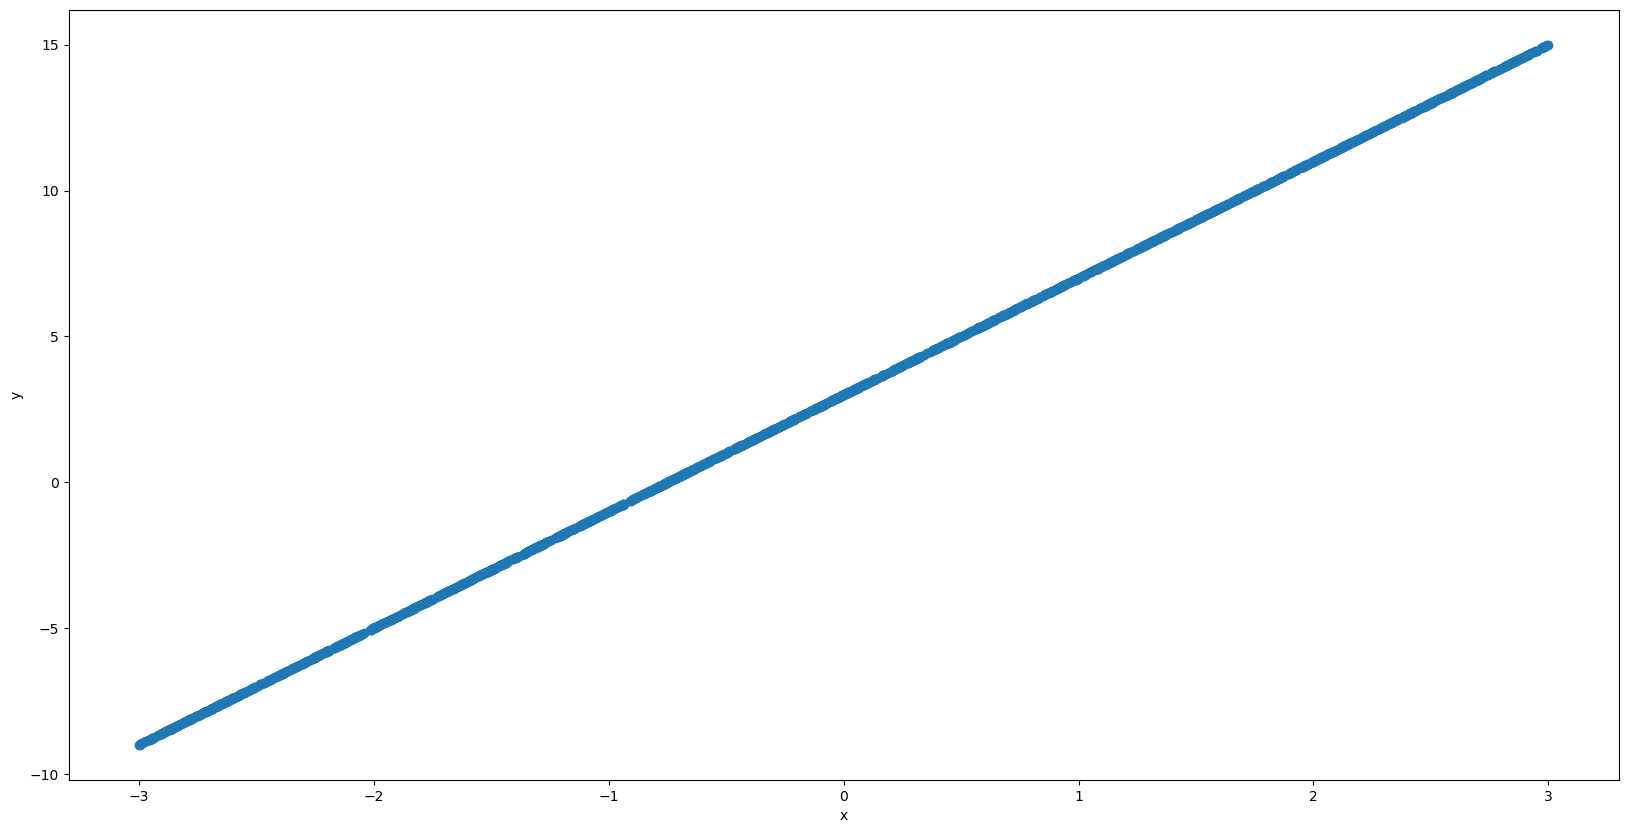

In [60]:
import torch
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x=(torch.rand((2000,1))-0.5)*6 #Generates 2,000 random numbers between -3,3 this is our input data

slope=4
intercept=3

y=slope*x+intercept

print(x.shape)
print(y.shape)
plt.scatter(x[:,0],y[:,0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Give it a try

use the cell below to create a dataset call my_x and my_y that
* has 1,000 examples
* has a slope of -1
* has an intercept of 4

In [1]:
"""your code here"""

'your code here'

In [134]:
"""run this to check your answer"""

assert 'my_x' in locals(), "my_x doesn't exist did you get the name correct"
print('my_x initialized')
assert 'my_y' in locals(), "my_y doesn't exist did you get the name correct"
print('my_y initialized')
assert my_x.shape==(1000,1), "my_x has the wrong shape"
print('my_x has the correct shape')
assert my_y.shape==(1000,1), "my_y has the wrong shape"
print('my_y has the correct shape')
assert (my_x*-1+4==my_y).all(),  "slope or intercept wrong"
print("the data have the correct slope and intercept")
print('Great your data is correct')



assert (x*4+3==y).all(),  "oops you may have overwritten x and y above re-run that cell so you have the right data for below"



my_x initialized
my_y initialized
my_x has the correct shape
my_y has the correct shape


AssertionError: slope or intercept wrong

# Training, Development, Testing     
* For almost all machine learning we'll need to divide our examples into 3 groups            
    * Training/Development/Testing
    * **Training**: examples used to fit our models
    * **Development**: examples for checking for over-fitting during training and development 
    * **Testing**: Examples for evaluating our final model but **not for making any modeling decisions**
    
**note -** you will often see only 2-splits: training and testing. This can be okay, but fails in some cases.

In [61]:
training=[]
development=[]
testing=[]
for i in range(len(x)):
    if torch.rand(1)>0.85:testing.append(i)
    elif torch.rand(1)>0.7:development.append(i)
    else: training.append(i)

x_test=x[testing]        
x_development=x[development]
x_train=x[training]

y_test=y[testing]        
y_development=y[development]
y_train=y[training]



## Model

Models can be anything from a simple linear model we'll use here to the most complicated deep-neural networks we're working toward. There are some commonalities
  * Models have parameters $\theta$ that control their output
  * Models are fit to data, normally by minimizing a **loss function ($L$)**
      * A Loss function ($L$) defines the goal of your model
  * Models also have hyper-parameters $H$ that determine their structure and how they fit to data

### Our simple model
* $y_{pred,i}=\theta_{1}*x_{i}+\theta_{2} $
* $L=\frac{1}{N}\sum_i (y_{pred,i}-y_{true,i})^2$
* **Goal**: Find $\theta_{1,2}$ that Minimizes $L$, or $min_\theta(L)$

Here $i$ represents each of our data points.

**Pro-Tip** Since we made our data set we already know what $\theta_{1}$ and $\theta_{2}$ should be (the slope and intercept), but it's almost always a good idea to try your model on data you understand before running it on new more complicated data. If you can't get it working with the data you know, there is no chance of getting it working with the data you don't.



In [62]:
import torch


class LinearModel(torch.nn.Module):

    def __init__(self,input_size=1):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        x = self.linear(x)
        return x

# The Above is all you really need for a torch model
# Code below is just helpful for the rest of this notebook    
    
    def loss(self,x,y):
        y_pred=self(x)
        return ((y_pred-y)**2).mean()

    def loss2(self):
       sl=model.linear.get_parameter('weight')
       int=model.linear.get_parameter('bias')
       return torch.sin(sl*5)+torch.sin(int*3)+(int**2+sl**2)*0.5

    def settheta(self,slope,intercept):
        sd=self.state_dict()
        sd['linear.weight']=torch.Tensor([[slope]]).float()
        sd['linear.bias']=torch.Tensor([intercept]).float()
        self.load_state_dict(sd)
        
    def print_parameters(self):
        print(self.state_dict())


model = LinearModel()

print('The model:')
print(model)

print('\n\nJust one layer:')
print(model.linear)

print('\n\nModel params:')
for param in model.parameters():
    print(param)




The model:
LinearModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


Just one layer:
Linear(in_features=1, out_features=1, bias=True)


Model params:
Parameter containing:
tensor([[-0.9169]], requires_grad=True)
Parameter containing:
tensor([-0.6655], requires_grad=True)


In [63]:
x_train.shape


torch.Size([1198, 1])

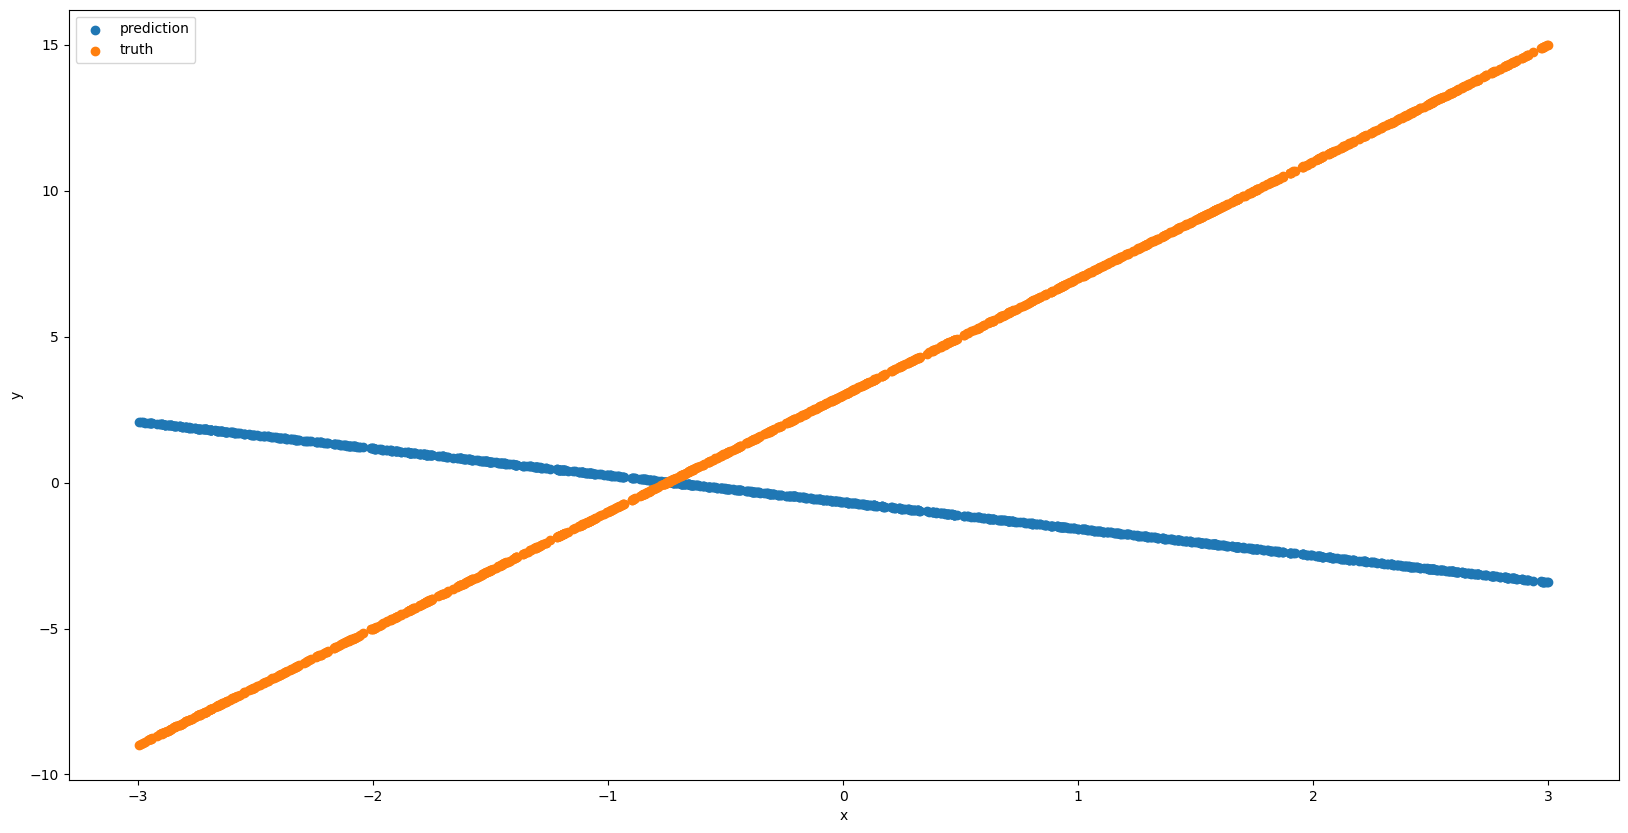

OrderedDict([('linear.weight', tensor([[-0.9169]])), ('linear.bias', tensor([-0.6655]))])
With theta values of None the loss is tensor(83.1739, grad_fn=<MeanBackward0>)
OrderedDict([('linear.weight', tensor([[2.]])), ('linear.bias', tensor([3.]))])
With theta values of None the loss is tensor(11.6123, grad_fn=<MeanBackward0>)


In [64]:

# Make a prediction by just calling the model
y_pred=model(x_train)

plt.scatter(x_train[:,0].detach().numpy(),y_pred[:,0].detach().numpy(),label='prediction')
plt.scatter(x_train[:,0].detach().numpy(),y_train[:,0].detach().numpy(),label='truth')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


print("With theta values of", model.print_parameters(), "the loss is", model.loss(x_train,y_train)) 
model.settheta(2,3)
print("With theta values of", model.print_parameters(), "the loss is", model.loss(x_train,y_train)) 



## Our Loss Function
Lets make a brute force plot of our loss function


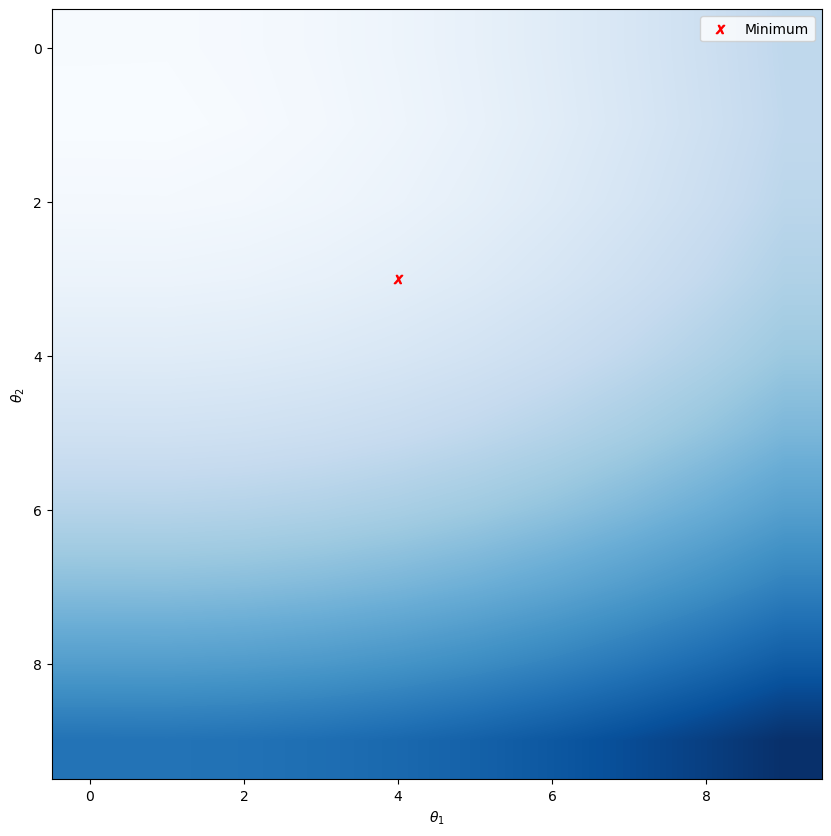

In [65]:
bins=10
plot_data=np.zeros((bins,bins))

for x_pixel,theta1 in enumerate(np.linspace(0,50,bins)):
    for y_pixel,theta2 in enumerate(np.linspace(0,50,bins)):
        model.settheta(theta1,theta2)
        with torch.no_grad():
            plot_data[x_pixel][y_pixel]=model.loss(x_train,y_train)
        
plt.imshow(plot_data,cmap='Blues',interpolation='bilinear')
#plt.imshow(plot_data,interpolation='bilinear')

plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.scatter([4],[3],marker='$X$',label='Minimum',color='r')
plt.legend()
 
        

## Exercise

Use the ```settheta()``` function, experiment with different values until you get a loss close to 10.

or  $min_{\theta}(L-10)^2$


In [66]:
model.settheta(2.7,.76)
print("This should equal zero:",(model.loss(x_train,y_train)-10)**2)

This should equal zero: tensor(0.0220, grad_fn=<PowBackward0>)


## Minimizing a loss function

How did you attempt the exercise above? If you did like me you might have done something like

* Try a number and see if the loss
* Try another number and see if the loss is closer to 10
    * If it is keep trying numbers in the same direction
    * If it isn't change directions 
* Keep trying numbers in the same direction until the loss passes 10
* Go back and try a number in-between the last two
* etc.

Machine learning algorithms work in a similar way

* Decide what the right direction to change the weights is to minimize the loss
    * It does this by calculating the **gradient**
* Take a step in that direction
    * How big a step? This is a **Hyper Parameter** called the **Learning Rate**
    

## Gradient
The gradient $\nabla_{\theta} L$ is a vector with one entry per parameter $\theta$ in your model, this vector points in the direction that increases the loss function. To minimize the loss function we want to take a step in the opposite direction.

$\theta_{new}=\theta_{current}-\alpha*\nabla_{\theta} L$

$\alpha$ controls how big a step along this vector.


The gradient is calculated by taking the partial derivative of the loss function with respect to the parameters.
It can be done by hand in this case, but often this will be done for you by software package you are using.

In this case for our model

$L=\frac{1}{N}\sum_i (y_{pred,i}-y_{true,i})^2$

$L=\frac{1}{N}\sum_i ((\theta_{1}*x_{i}+\theta_{2})-y_{true,i})^2$

$dL/d\theta_1= \nabla_{\theta} L_{1}= 2*\frac{1}{N}\sum_i ((\theta_{1}*x_{i}+\theta_{2})-y_{true,i})*x_{i}$          
$dL/d\theta_2= \nabla_{\theta} L_{2}=2*\frac{1}{N}\sum_i ((\theta_{1}*x_{i}+\theta_{2})-y_{true,i})$         

## Learning Rate



Run the cell below - it will run the code below and perform **steps=100** optimization steps, starting from a random theta where each step is:
* Calculate: $\nabla_{\theta} L$
* Update: $\theta_{new}=\theta_{current}-\alpha*\nabla_{\theta} L$
* Repeat

and try different values of the learning rate lr ($\alpha$ above) with big steps i.e. {1e-4,1e-3,1e-2,1e-1,...}
You should see that too big a step can cause the optimization to fail, and too small a step can make the optimization take too long.

* How big a learning rate can you use before the code below fails?
* How small a learning rate does it take for the optimization to not reach the target in time?

In [67]:
#We'll come back to how to write a training loop in a little bit, so just use this as a function for now

def optimize(model,x_train,y_train,lr=1e-3,steps=1e-5,batch_size=None):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    grads=[]
    path=[]
   # print([i for i in model.parameters()])
    for step in range(steps):
        optimizer.zero_grad()
        if batch_size is None:
            loss = model.loss(x_train, y_train)
        else:
            index=np.random.choice(range(len(x_train)),batch_size )
            loss = model.loss(x_train[index], y_train[index])
        
        loss.backward()
        path.append((model.linear.get_parameter('weight').item(),model.linear.get_parameter('bias').item()))
        grads.append((model.linear.get_parameter('weight').grad.squeeze().item(),model.linear.get_parameter('bias').grad.squeeze().item()))
        optimizer.step()

    return  grads,path

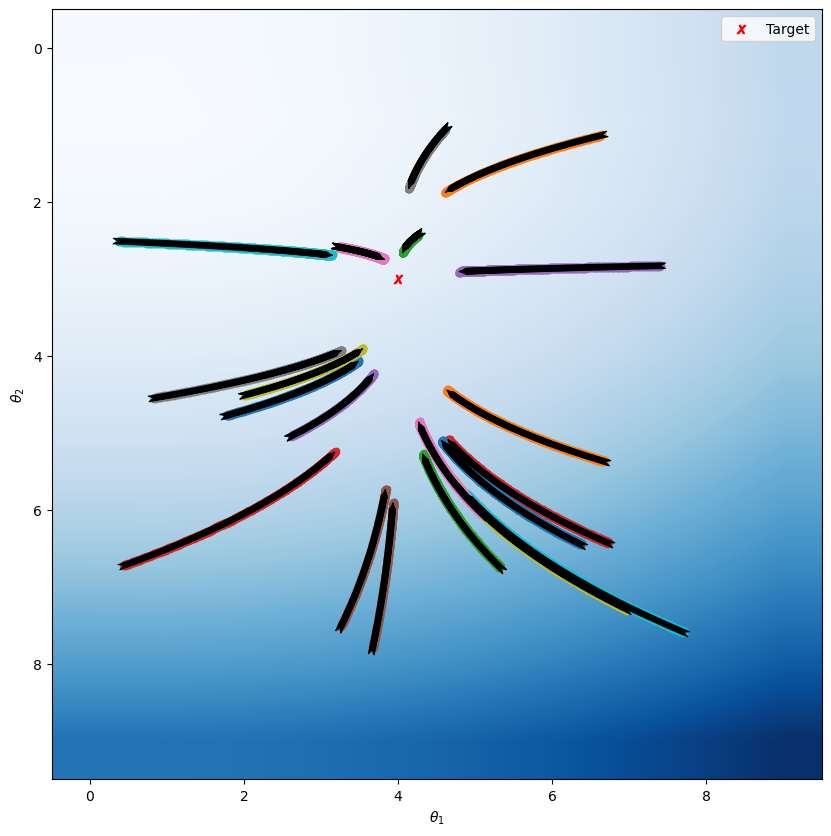

In [68]:
"This cell starts with random values of theta and optimizes our linear model"
lr=1e-3
n_starts=20
steps=250

plt.rcParams["figure.figsize"] = (20,10)    #you can play with these values to make your plot bigger
                                            #but if you go off the page, it may "collapse" to be small again

plt.imshow(plot_data,cmap='Blues',interpolation='bilinear')


for i in range(n_starts):
    model.settheta(np.random.uniform(0,8),np.random.uniform(0,8))
    grads,path=optimize(model,x_train,y_train,lr,steps=steps)
    x_points,y_points=zip(*path)
    plt.scatter(x_points,y_points,marker='$O$')
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_2$")
    
    ax=plt.gca()

    for (_x,_y),(_gx,_gy) in zip(path,grads):
        ngx= -1*_gx*lr
        ngy= -1*_gy*lr

        ax.annotate("", xy=(_x+ngx, _y+ngy), xytext=(_x, _y),
             arrowprops=dict(arrowstyle="->"))

       # plt.arrow(_x, _y, -1*ngx*lr, -1*ngy*lr)
plt.scatter([4],[3],marker='$X$',label='Target',color='r')
plt.legend()
plt.show()

# Stochastic  Gradient Descent 


Above when we calculate $\nabla_{\theta} L$ we have an equation that looks like this

$dL/d\theta_1= \nabla_{\theta} L_{1}= 2*\frac{1}{N}\sum_i ((\theta_{1}*x_{i}+\theta_{2})-y_{true,i})*x_{i}$          

However, the sum $\sum_i$ over every data point $i$ can become very expensive especially for large datasets. To get around this we use a technique called Stochastic Gradient Descent. We use the same technique before, but with only a subset of the data. So instead of all examples we use only 20 (for example). The number we use is a new hyper-parameter **Batch Size**.

**Batch Size** = Number of examples to use when calculating the gradient with Stochastic  Gradient Descent 





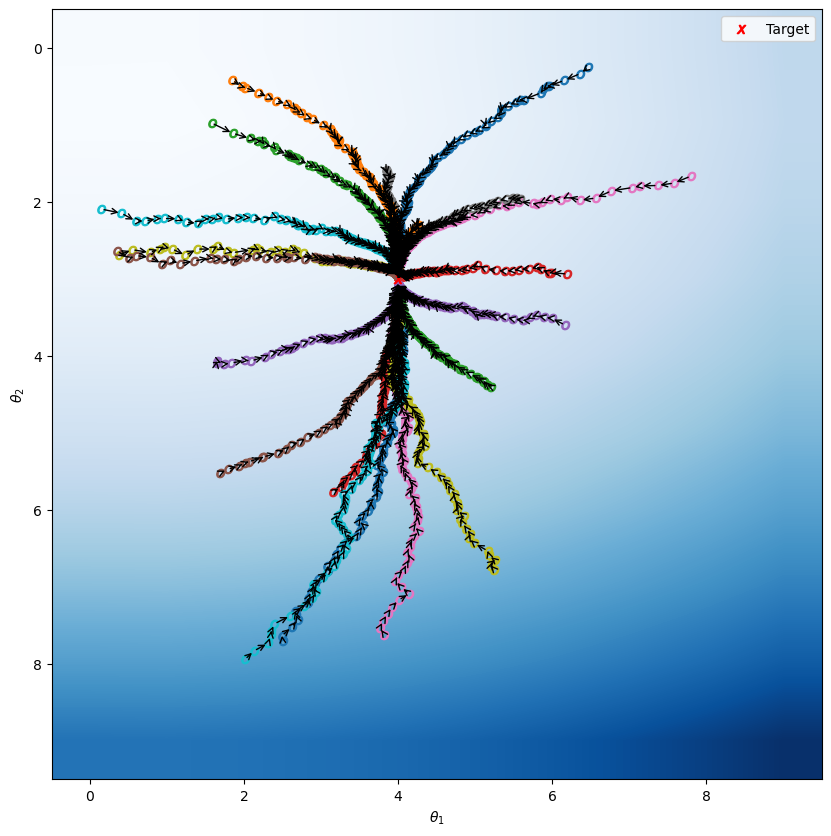

In [69]:
"This cell starts with random values of theta and optimizes our linear model"
lr=1e-2   
batch_size=5
plt.imshow(plot_data,cmap='Blues',interpolation='bilinear')


for i in range(n_starts):
    model.settheta(np.random.uniform(0,8),np.random.uniform(0,8))
    grads,path=optimize(model,x_train,y_train,lr,steps=100,batch_size=batch_size)
    x_points,y_points=zip(*path)
        
    plt.scatter(x_points,y_points,marker='$O$')
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$\theta_2$")
    
    ax=plt.gca()

    for (_x,_y),(_gx,_gy) in zip(path,grads):
        ngx= -1*_gx*lr
        ngy= -1*_gy*lr

        ax.annotate("", xy=(_x+ngx, _y+ngy), xytext=(_x, _y),
             arrowprops=dict(arrowstyle="->"))

       # plt.arrow(_x, _y, -1*ngx*lr, -1*ngy*lr)
plt.scatter([4],[3],marker='$X$',label='Target',color='r')
plt.legend()
plt.show()

# Key Points

* We train neural networks with stocastic gradient descent
* **Learning rate** - too high your model won't converge, too low and it will take forever
* **Batch Size**  Bigger the batch size the more stable the gradient, (this is not always good, your model can get 'stuck' in local minimia)




## Task: Fit a slightly harder straight line

We're going to make a data set where x is a series of 3 features, and a target value $y = 2*x_0+1$ 

$y$ is just a line with respect to $x_0$, and completely ignores $x_{1,2,3,4}$ 

This problem is a little bit more difficult than the 1st lecture since we need to learn that two of the input features don't correlate at all to the output.

In the code above we define an Input layer and one Dense (Fully Connected Layer), in our equation above
i=1 n=data_dim
if data_dim ==1
then 

$O_i = \sum_n W_{i,n}*X_n+B_i  = O_0 =  W_{0,0}*X_0+B_0$

You'll notice from last lecture this is the same form as our linear model.

* $y_{pred,i}=\theta_{1}*x_{i}+\theta_{2} $

* Each 'neuron' in a dense network is one linear model

in neural network lingo 
*  $W$ is called the weight matrix 
*  $B$ the bias
*  $W$ is a matrix and can have several parameters and all the parameters in the network are often represented by just $\theta$ 

Just as in our Linear model we are going to use the same loss function
* $L=\frac{1}{N}\sum_i (y_{pred,i}-y_{true,i})^2$
* which is Mean Squared Error or mse for short
* and we will pick an optimizer 'adam'




# Fitting your Model
Lets try to fit a simple line using the model below

<img src="https://raw.githubusercontent.com/jsearcy1/DNNWS_2022/refs/heads/develop/assets/network_diagrams/nn_3_1.png">


In [70]:
linear_model=linear_model=MLP_3_Model()
print(linear_model)

MLP_3_Model(
  (linear): Linear(in_features=3, out_features=1, bias=True)
)


In [71]:
linear_model=MLP_3_Model()


# Training Loops

In torch you'll need to implement your own training loop which has the following steps

* Loop over your data for a number of 'epochs' (times through your data)
                     
* For each epoch you'll randomly grab data-points to form batches
* For each batch calculate the loss function
* Use the loss function to update the parameters using and optimizers
* Reset gradient
* repeat


# Build the Dataset
Pytorch datasets

In [72]:

from torch.utils.data.dataset import random_split
from torch.utils.data import DataLoader, TensorDataset, Subset

data_dim=3


x=torch.rand(size=(10000,data_dim))*10
def func(X):
    return 2*X[:,0]+1  # #Ignore all other input have the output only depend on the first dimention
y=func(x)


dataset=TensorDataset(x,y)

train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset,test_dataset = random_split(dataset, [train_size, val_size,test_size])




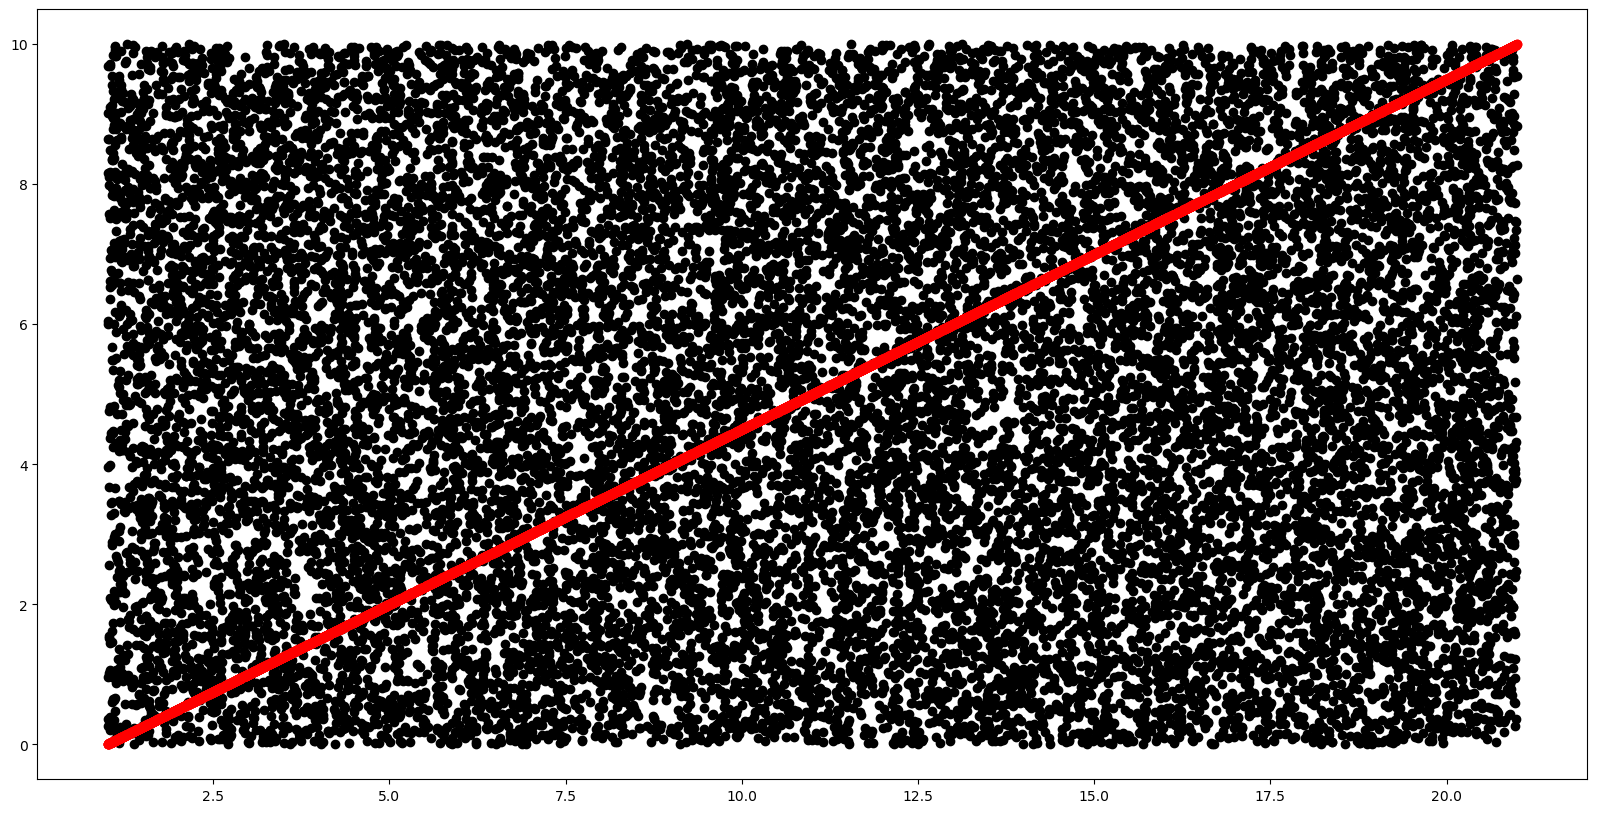

In [73]:
plt.scatter(y,x[:,1],color='k')
plt.scatter(y,x[:,2],color='k')
plt.scatter(y,x[:,0],color='r')


In [74]:
print(train_dataset[0])

(tensor([9.8356, 8.9380, 7.8666]), tensor(20.6712))


In [75]:
#Dataset Loaders

In [76]:
#dataset loaders

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [77]:
for _x,_y in train_loader:
    print(_x.shape,_y.shape)
    break

torch.Size([64, 3]) torch.Size([64])


In [78]:
# Setup Optimizers and loss

In [79]:
lr=1e-2
optimizer = torch.optim.Adam(linear_model.parameters(), lr=lr)
loss_fn= torch.nn.MSELoss() # This is usefult, but you use your own equations too!

In [80]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


100%|██████████| 10/10 [00:00<00:00, 20.17it/s]


Done Training


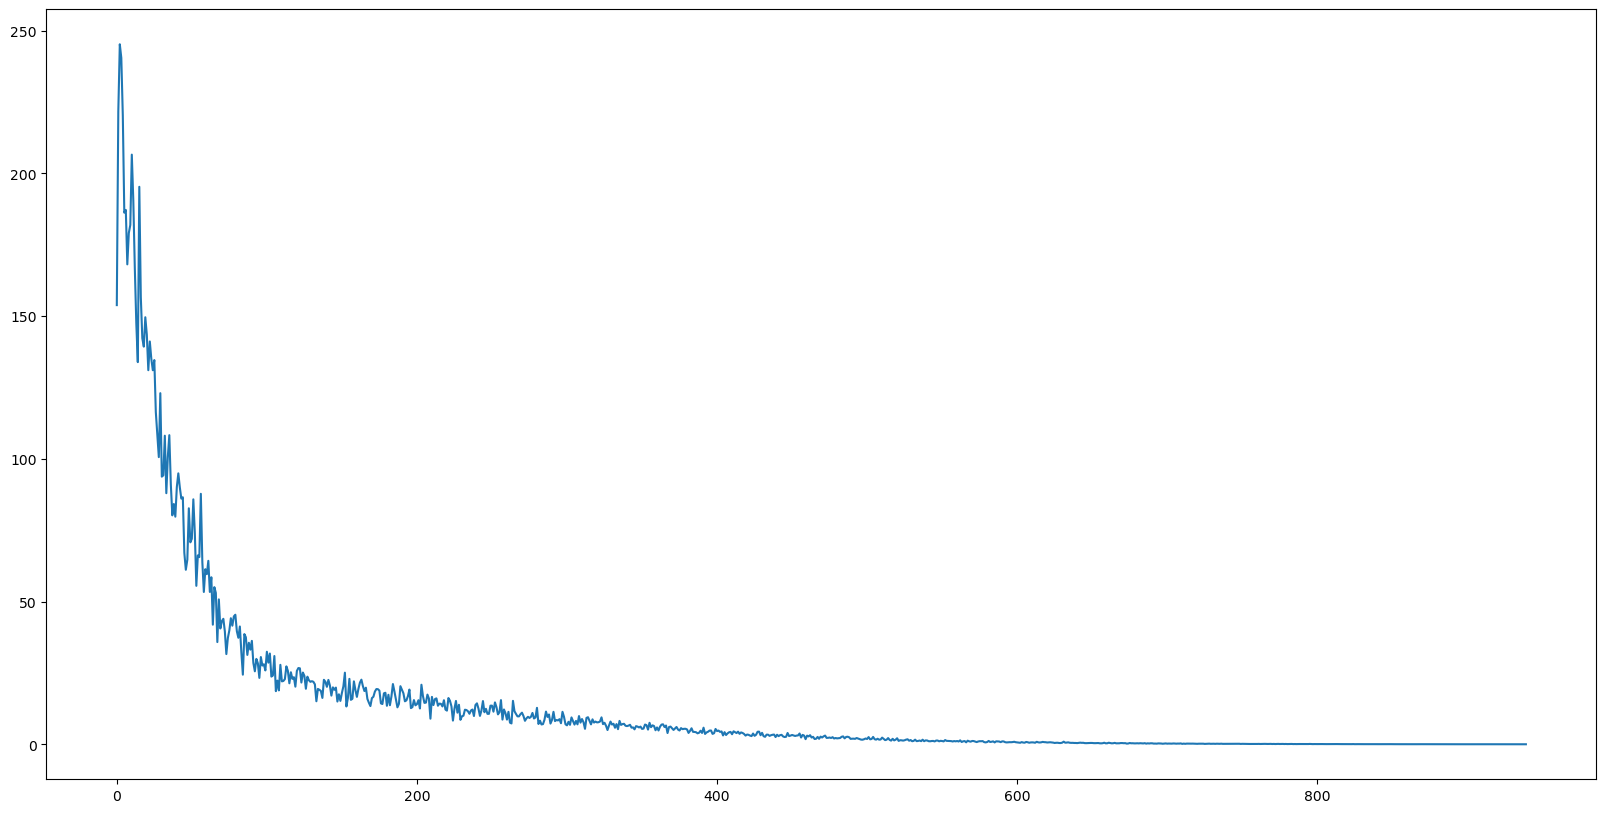

In [81]:
from tqdm import tqdm

# Training Loop
n_epochs=10
linear_model.train()
loss_vals=[]
for _epoch in tqdm(range(n_epochs)):
    for x_batch,y_batch in train_loader:
      optimizer.zero_grad()
      y_pred = linear_model(x_batch).squeeze()

      loss = loss_fn(y_pred,y_batch)
      loss.backward()
      loss_vals.append(loss.item())
      optimizer.step()
plt.plot(loss_vals)
print('Done Training')

In [82]:
linear_model.eval()

with torch.no_grad():
    prediction=[]
    target=[]
    for x_batch,y_batch in val_loader:
        prediction.append(linear_model(x_batch))
        target.append(y_batch)
    #combine
    y_pred=torch.cat(prediction,dim=0)
    y_true=torch.cat(target,dim=0)


Excellent you've fit your first neural network, now lets use it
* we split our initial dataset into a train/develop using validation split
* Lets make a new dataset that has X_0 from -5-15, with X_1,X_2 being random
    * This is just a way to plot the output


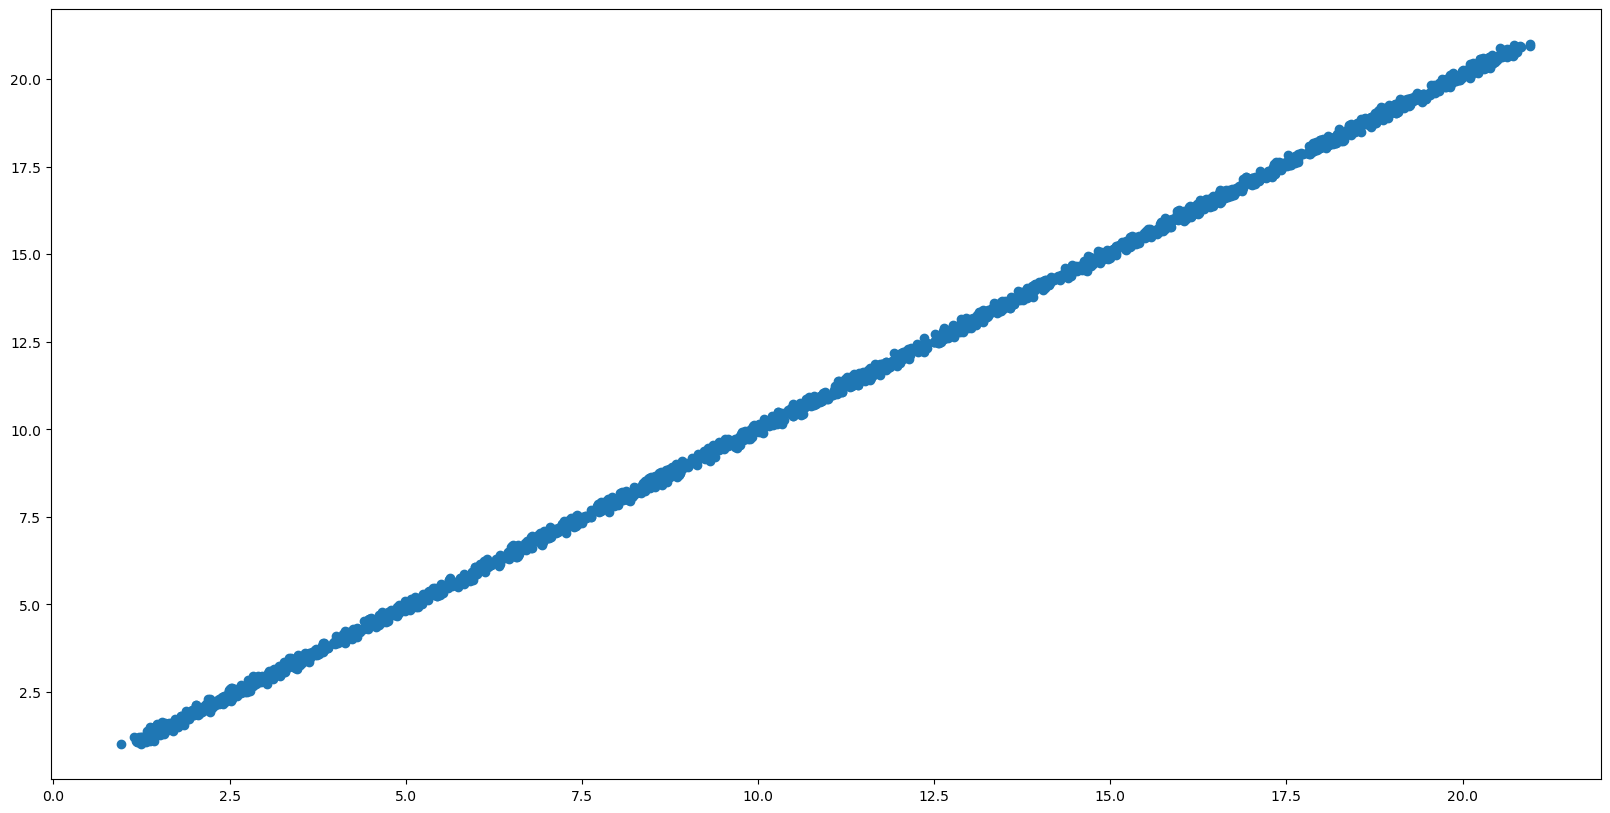

In [83]:
plt.scatter(y_pred,y_true)

# Try it yourself 
Run the cell below to create a similar data set, but this time with some noise

$y = 2*x_0+1+N(0,2)$ 


In [84]:
"""Write your Model"""
"Build Dataset"
"Create data loaders"
"Write Training Loop"
"Train!"


'Train!'

In [119]:
#build dataset
from torch.utils.data.dataset import random_split
from torch.utils.data import DataLoader, TensorDataset, Subset
import numpy as np

data_dim=3

x=torch.rand(size=(10000, data_dim))*10

def func(X):
    return 2*X[:,0]+1+np.random.normal(0,2,size=X.shape[0])
y=func(x).float()

dataset=TensorDataset(x,y)

train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset,test_dataset = random_split(dataset, [train_size, val_size,test_size])

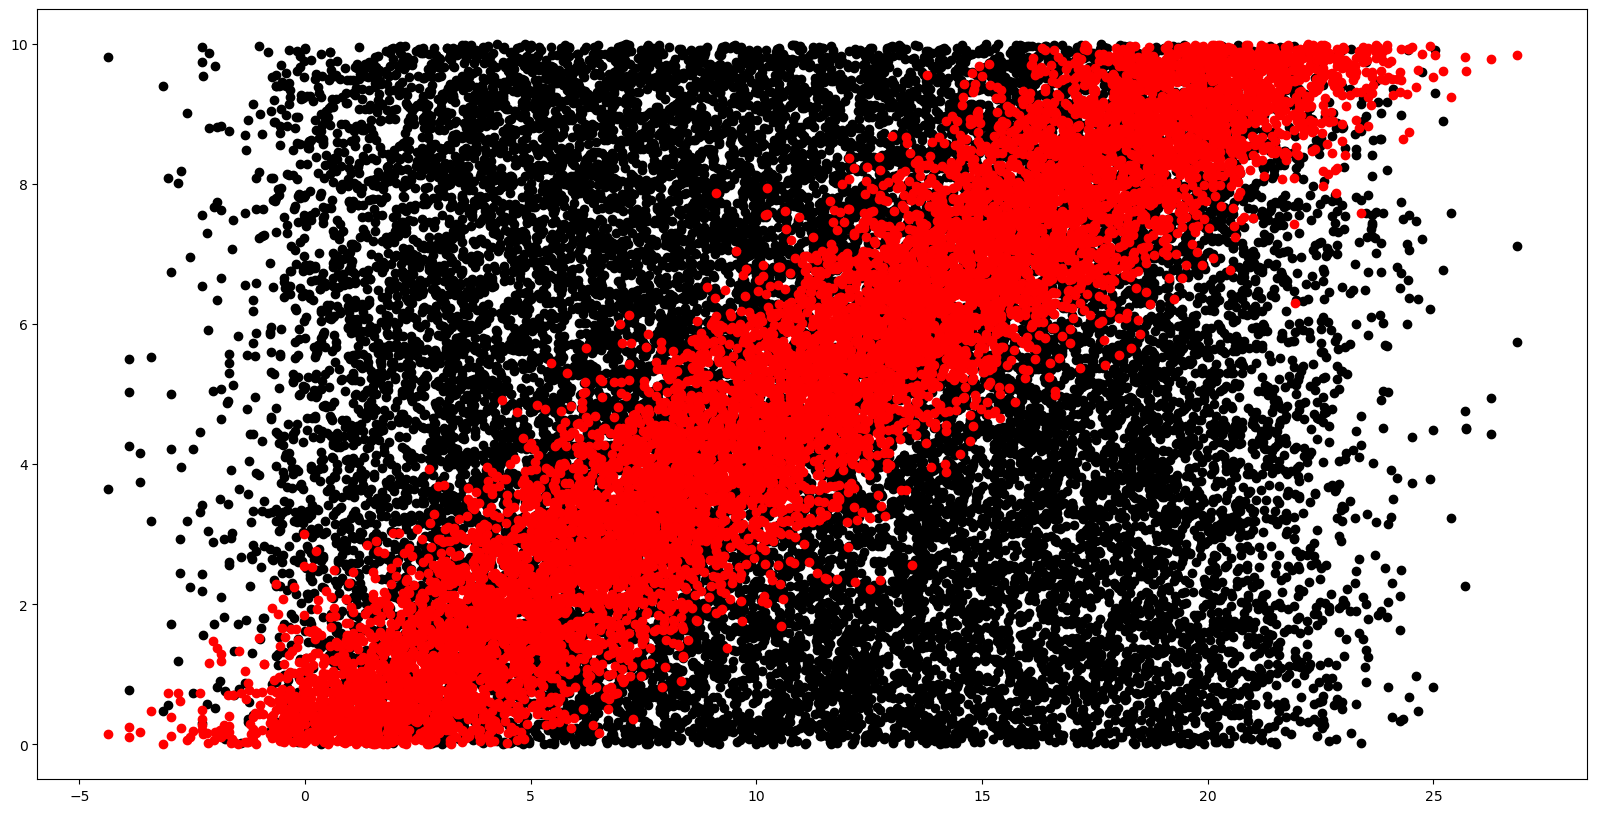

In [120]:
plt.scatter(y,x[:,1],color='k')
plt.scatter(y,x[:,2],color='k')
plt.scatter(y,x[:,0],color='r')

In [121]:
#dataset loaders

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [122]:
for _x,_y in train_loader:
    print(_x.shape,_y.shape)
    break

torch.Size([64, 3]) torch.Size([64])


In [125]:
#optimizers and loss:
linear_model=MLP_3_Model()


lr=1e-2
optimizer = torch.optim.Adam(linear_model.parameters(), lr=lr)
loss_fn= torch.nn.MSELoss() # This is useful, but you use your own equations too!

100%|██████████| 10/10 [00:00<00:00, 20.41it/s]


Done Training


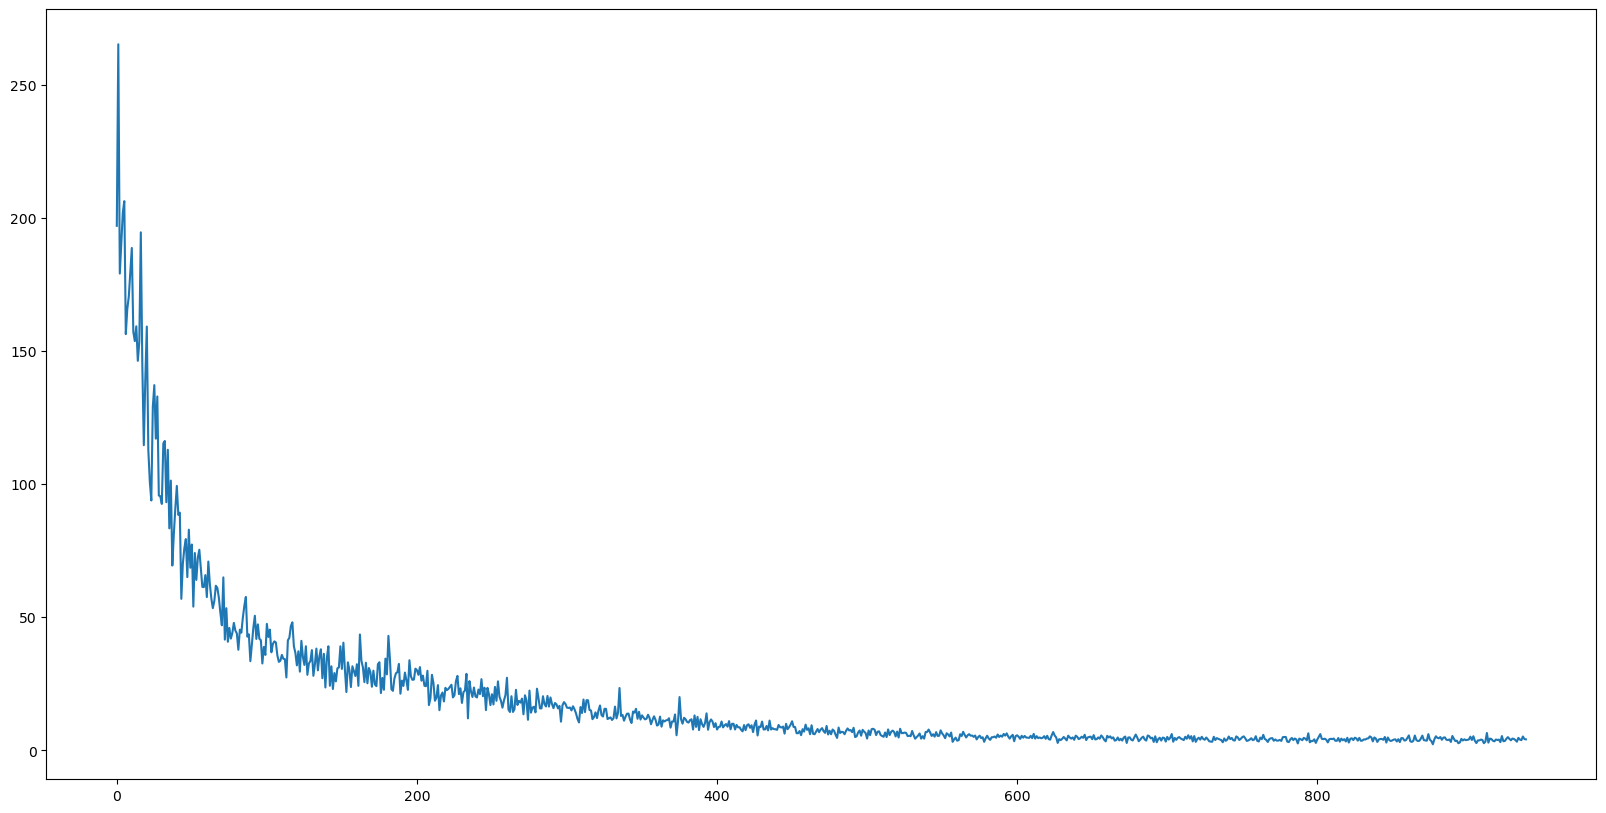

In [126]:
#training loop:

from tqdm import tqdm
n_epochs=10
linear_model.train()
loss_vals=[]
for _epoch in tqdm(range(n_epochs)):
    for x_batch,y_batch in train_loader:
      optimizer.zero_grad()
      y_pred = linear_model(x_batch).squeeze()

      loss = loss_fn(y_pred,y_batch).float()
      loss.backward()
      loss_vals.append(loss.item())
      optimizer.step()
plt.plot(loss_vals)
print('Done Training')

In [101]:
np.random.normal(0, 2, size=(10000))

array([-1.52286848,  0.79065909, -2.52834476, ..., -0.57851023,
        0.78618204, -5.92436693])

torch.Size([10000, 3]) tensor([8.9385, 5.7902, 8.9766,  ..., 7.6667, 0.6678, 0.8034])


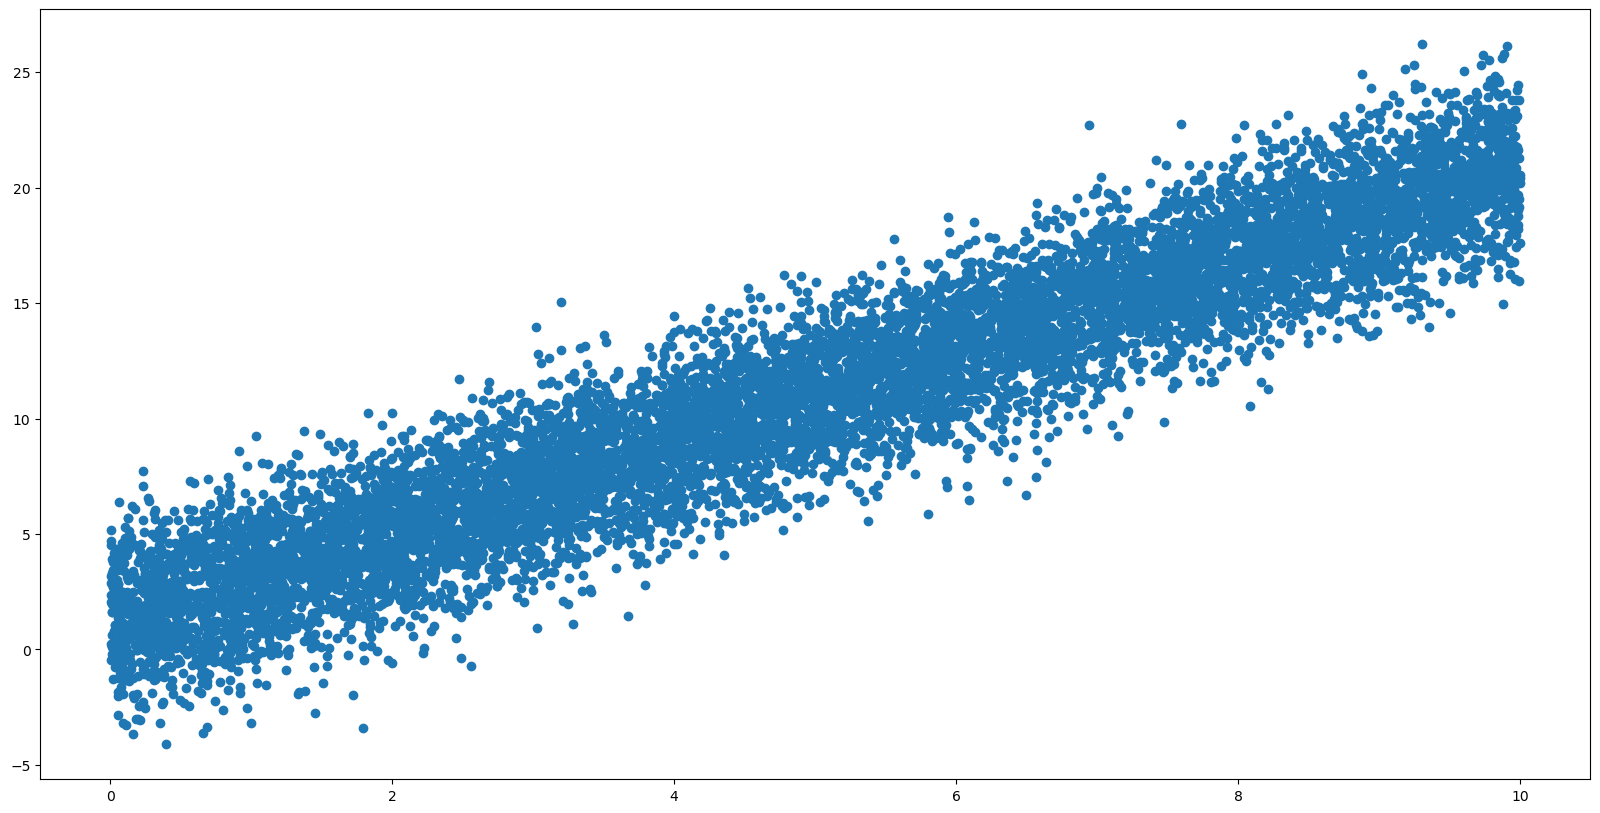

In [102]:
print(x.shape,x[:,0])
plt.scatter(x[:, 0],y)
plt.show()

In [ ]:
"""Write Testing Loop"""


In [ ]:
"""Plot"""


## Lets try something a bit more complicated a sin wave

In [103]:
# To save on code we can package up all our training into functions

def evaluate(model,data_loader):
    with torch.no_grad():
        prediction=[]
        target=[]
        input_1d=[]
        for x_batch,y_batch in data_loader:
            prediction.append(model(x_batch))
            target.append(y_batch)
            input_1d.append(x_batch[:,0:1])
        #combine
        y_pred=torch.cat(prediction,dim=0)
        y_true=torch.cat(target,dim=0)
        x_in=torch.cat(input_1d,dim=0)
    return y_pred,y_true,x_in

def fit(model,train_loader,val_loader,n_epochs=10,lr=1e-2):
    # Make optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn= torch.nn.MSELoss() # This is usefult, but you use your own equations too!
    
    loss_values=[]
    val_loss_values=[]
    train_loss_values=[]
    for _epoch in tqdm(range(n_epochs)):
        model.train()
        for x_batch,y_batch in train_loader:
          optimizer.zero_grad()
          y_pred = model(x_batch).squeeze()
    
          loss = loss_fn(y_pred,y_batch)
          loss.backward()
          loss_vals.append(loss.item())
          optimizer.step()
        
    # Eval
        y_pred,y_true,x_in=evaluate(model,val_loader)
    
        val_loss_values.append(loss_fn(y_pred.squeeze(),y_true))        
        train_loss_values.append(np.mean(loss_vals[-10:]))
    
    y_pred,y_true,x_in=evaluate(model,val_loader)
    ytr_pred,ytr_true,xtr_in=evaluate(model,train_loader)

    plt.plot(val_loss_values,label='Val. Loss')
    plt.plot(train_loss_values,label='Train Loss')
    plt.yscale('log')
    plt.legend()
    plt.show()
    plt.scatter(y_pred,y_true)
    plt.show()
    plt.scatter(x_in.squeeze(),y_pred,color='b',marker='x')
    plt.scatter(x_in.squeeze(),y_true,color='r',marker='x',)

    plt.scatter(xtr_in.squeeze(),ytr_pred,color='k',alpha=0.1)
    plt.scatter(xtr_in.squeeze(),ytr_true,color='k',alpha=0.1,marker='x',)
    
    plt.show()


In [104]:
data_dim=3
x=torch.rand(size=(10000,data_dim))*10
def func(X):
    return torch.sin(X[:,0]) #Ignore all other input have the output only depend on the first dimention
y=func(x)

sin_dataset=TensorDataset(x,y)

train_size = int(0.6 * len(sin_dataset))
val_size = int(0.2 * len(sin_dataset))
test_size = len(sin_dataset) - train_size - val_size

train_sin_dataset, val_sin_dataset,test_sin_dataset = random_split(sin_dataset, [train_size, val_size,test_size])


batch_size = 64
train_sin_loader = DataLoader(train_sin_dataset, batch_size=batch_size, shuffle=True)
val_sin_loader = DataLoader(val_sin_dataset, batch_size=batch_size, shuffle=False)

sin_model=MLP_3_Model()


100%|██████████| 10/10 [00:00<00:00, 17.24it/s]


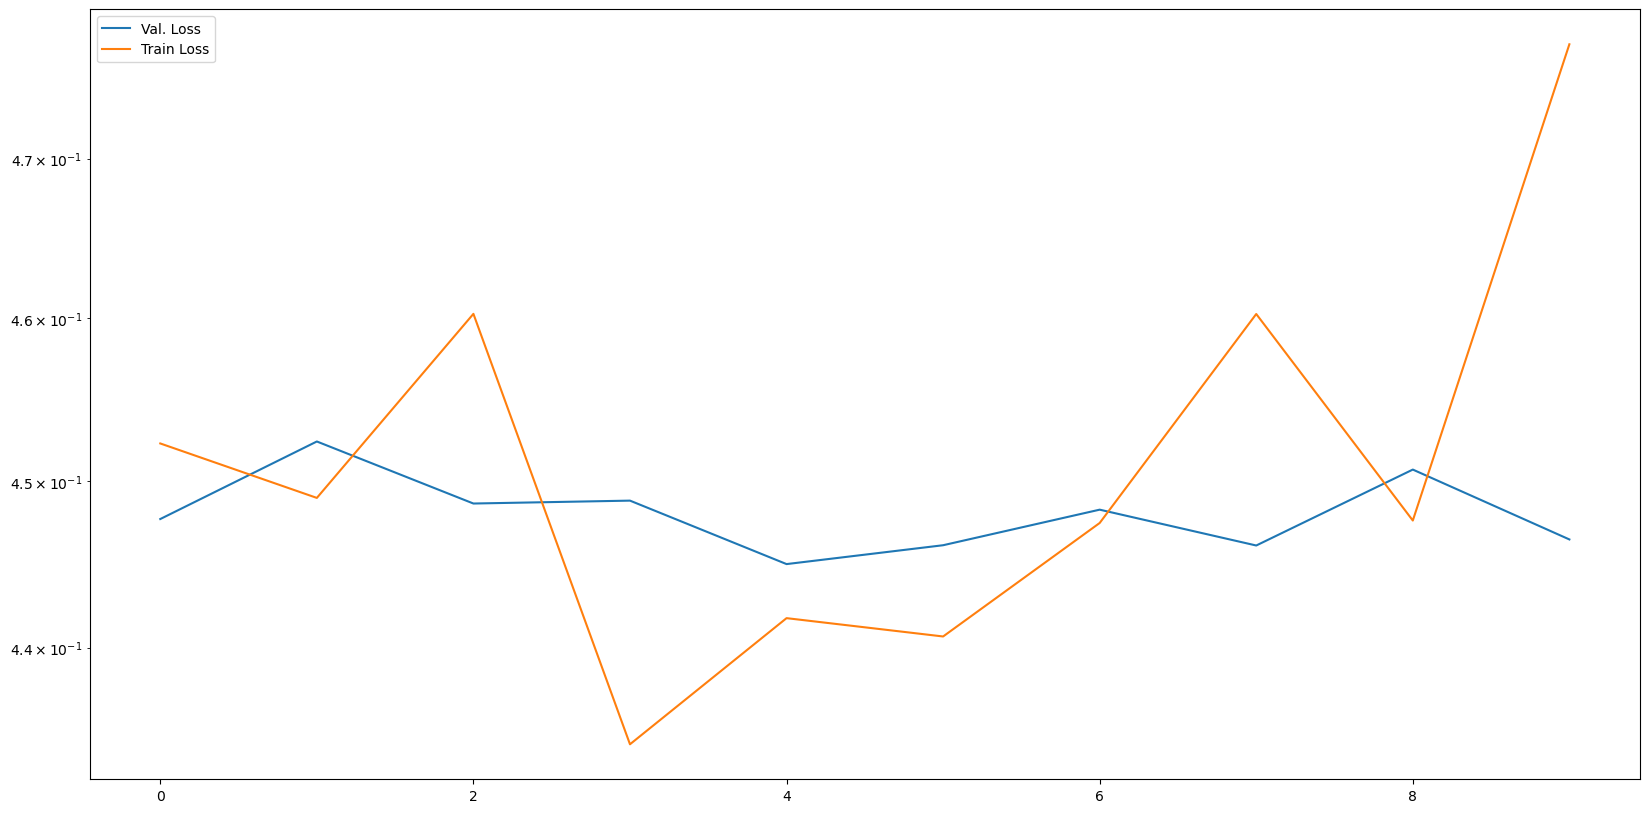

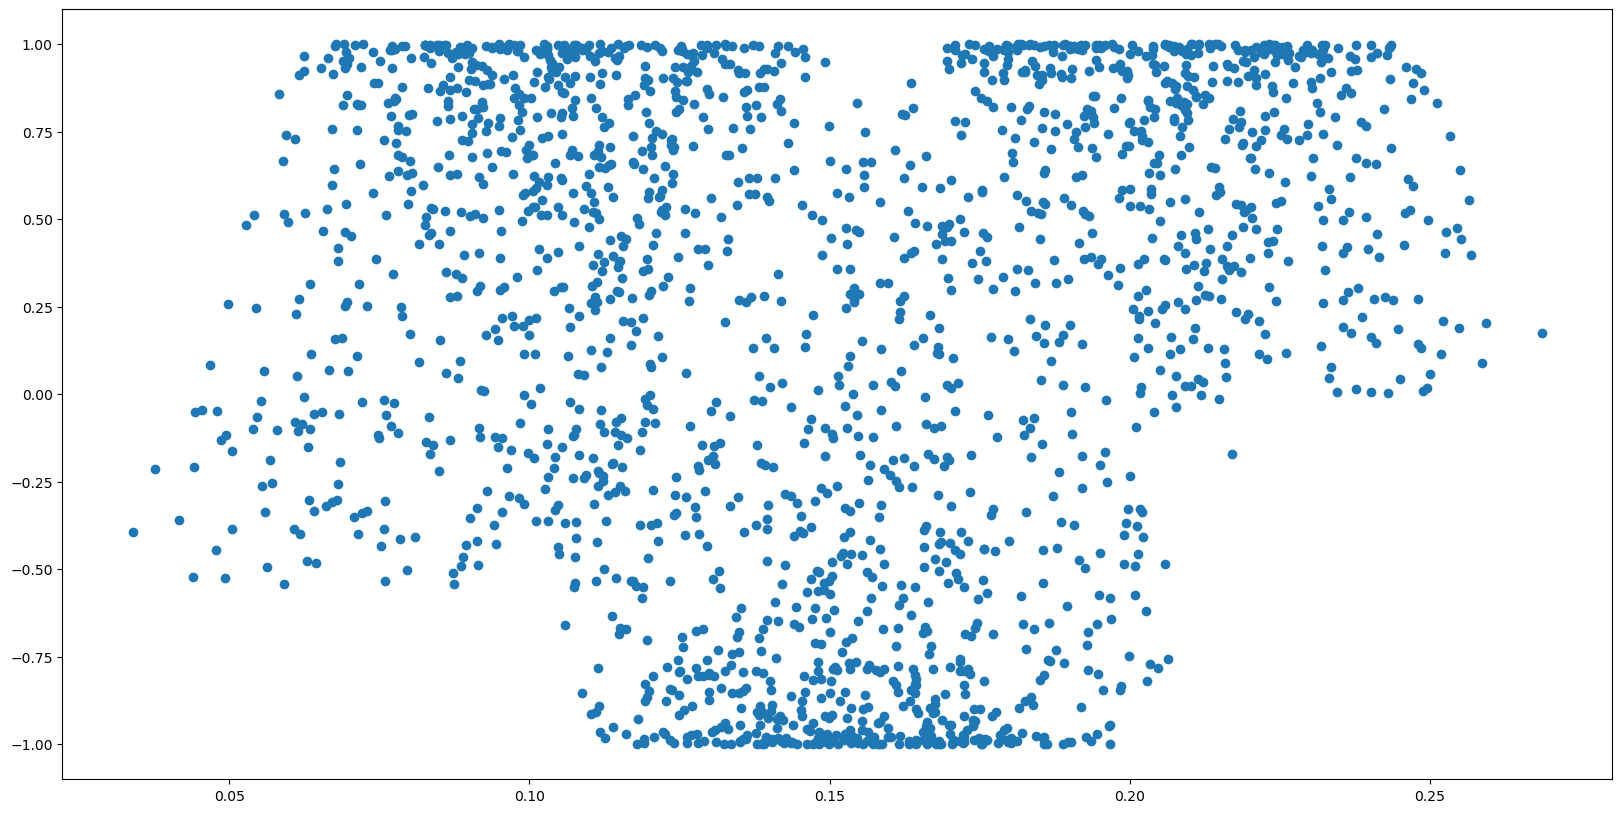

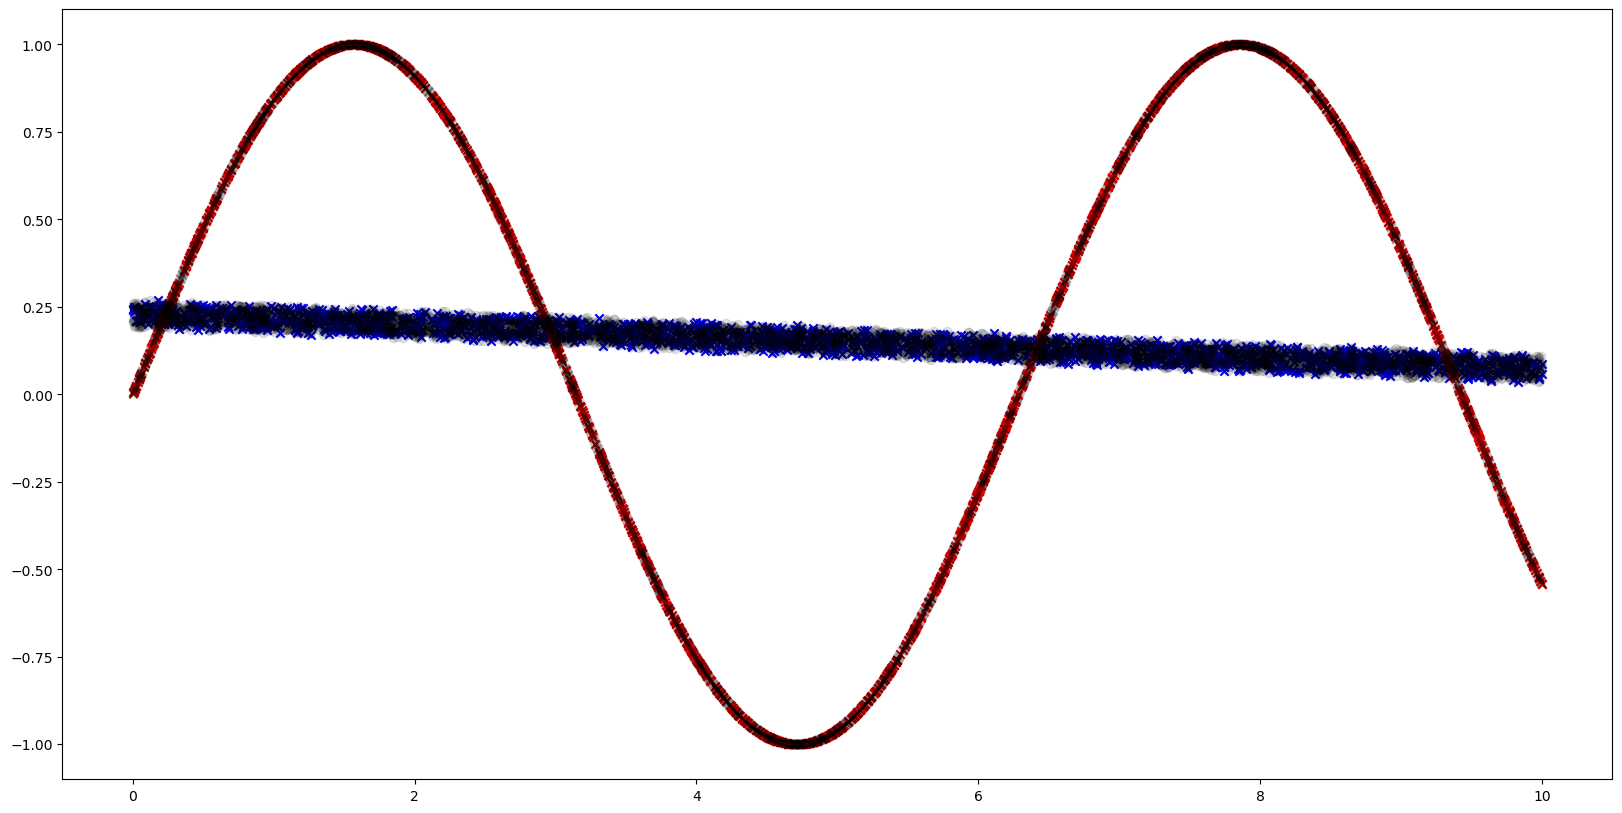

In [105]:
fit(sin_model,train_sin_loader,val_sin_loader)

Oops this didn't work. Why? So far what we wrote above can only represent linear functions

<p style="text-align: center;">
$O_i = \sum_n W_{i,n}*X_n+B_i$    
</p>

we need to add something called an activation function $\sigma$

<p style="text-align: center;">
$O_i = \sigma(\sum_n W_{i,n}*X_n+B_i)$    
</p>

$\sigma$ has to be non-linear and a good choice is a LeakyReLU

<img src='./assets/leakyReLU.png'>

an activation can be added just like any other layer




100%|██████████| 10/10 [00:00<00:00, 14.44it/s]


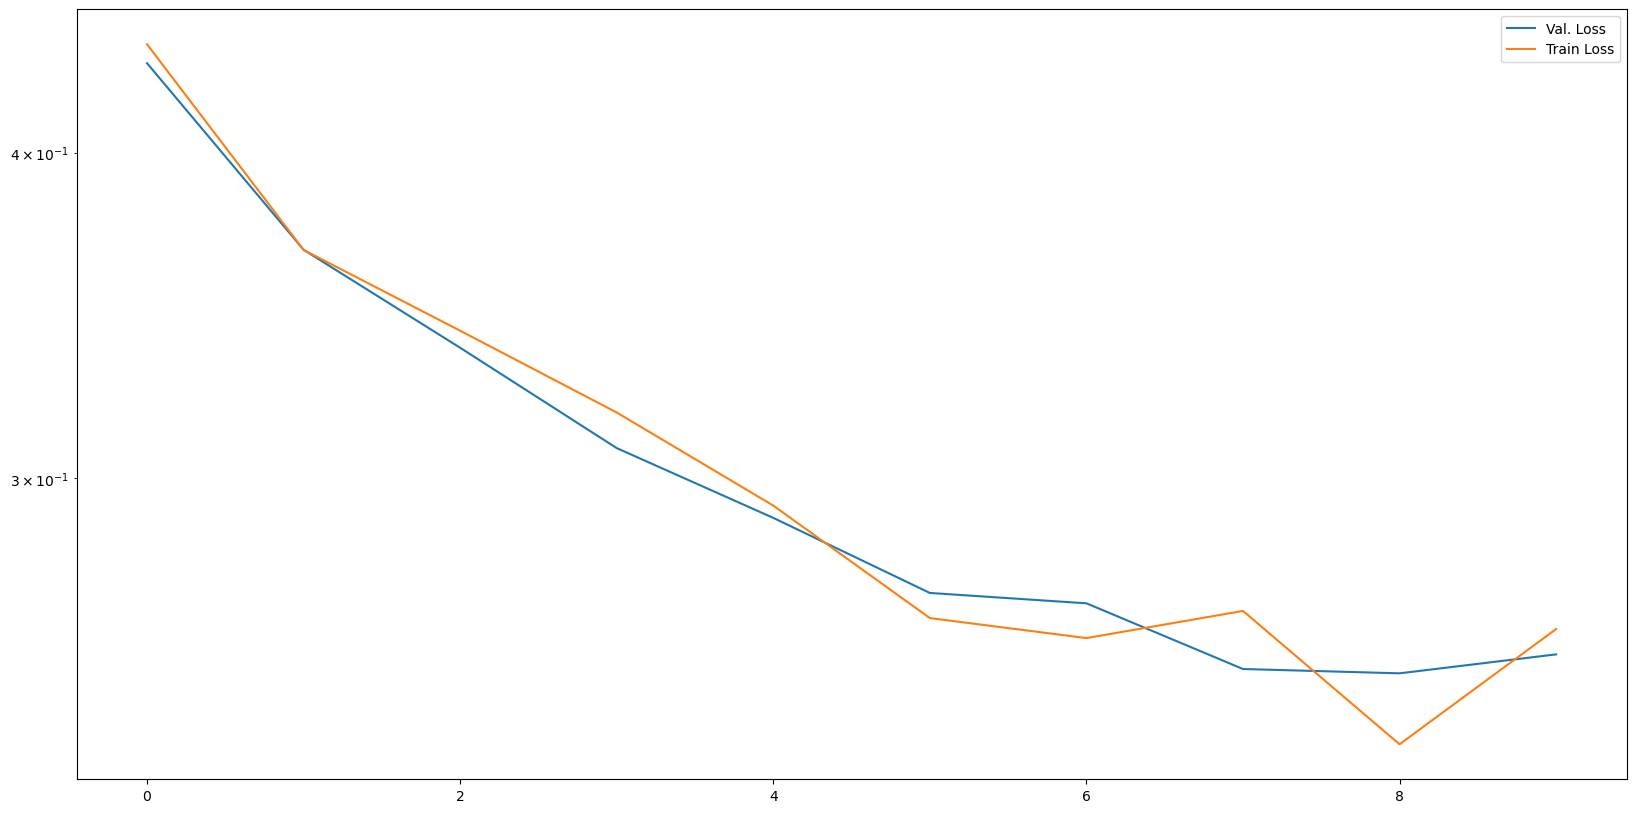

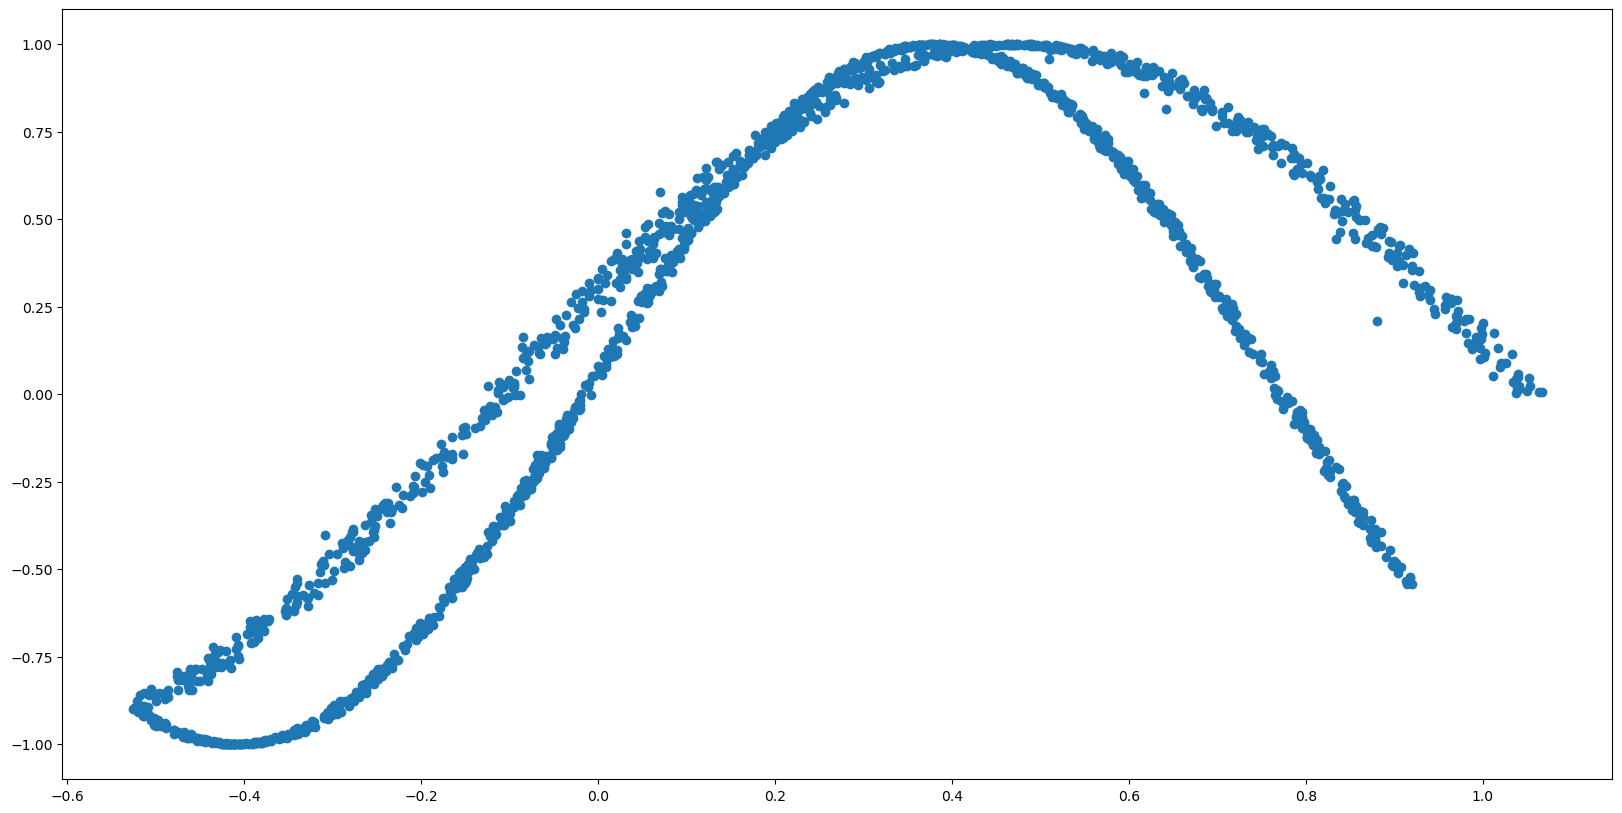

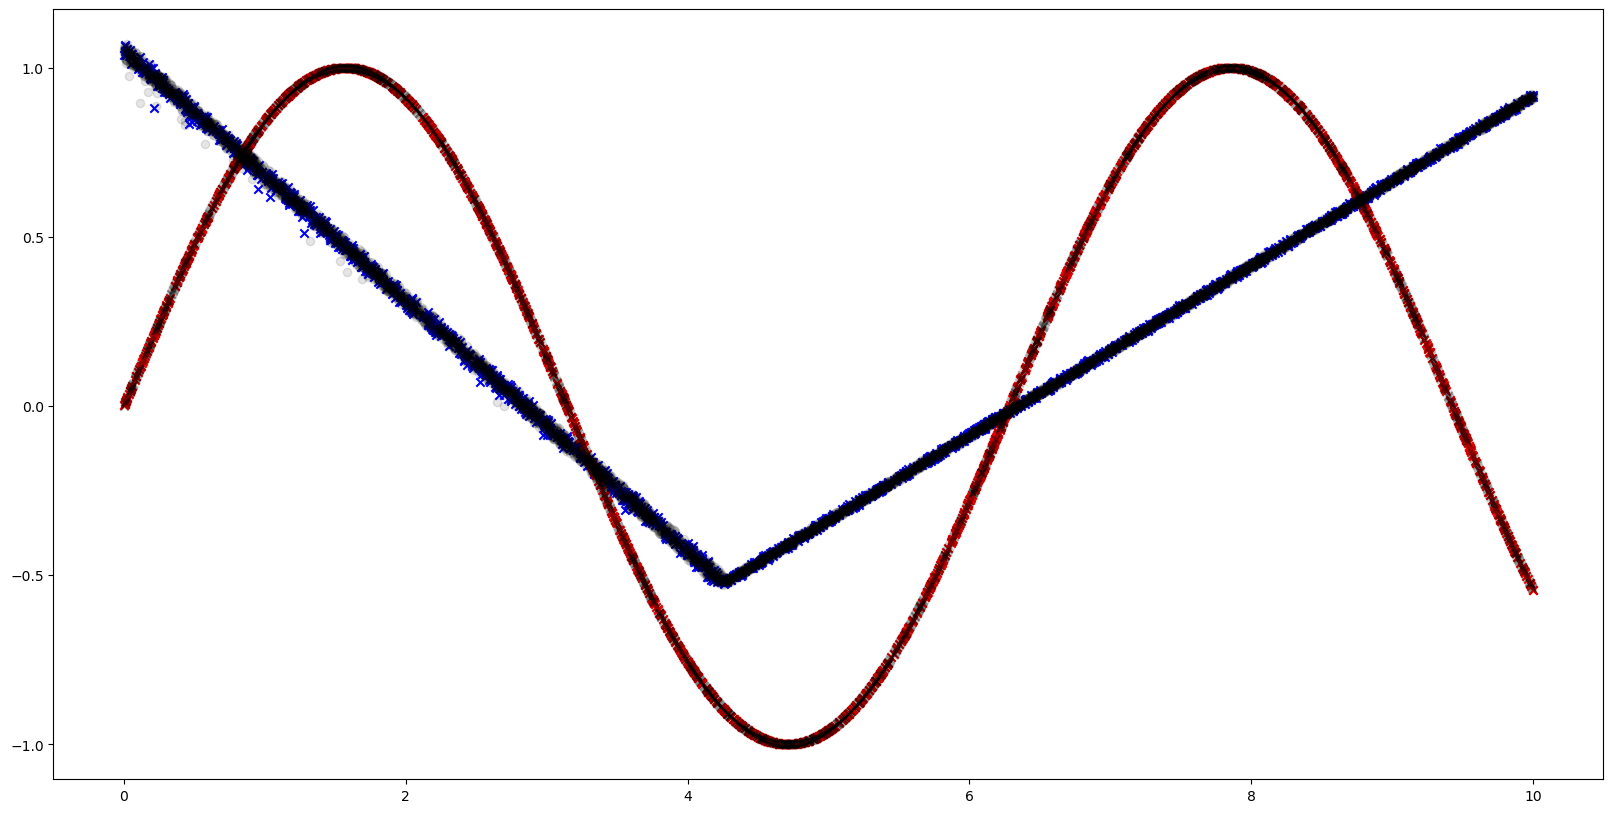

In [106]:
class Sin_model2(torch.nn.Module):

    def __init__(self,):
        super(Sin_model2, self).__init__()
        self.linear_1 = torch.nn.Linear(3, 3) # 3->3
        self.linear_2 = torch.nn.Linear(3, 1) # 3->3   
        self.act=torch.nn.LeakyReLU()
    
    def forward(self, x):
        x = self.linear_1(x)
        x = self.act(x)
        x = self.linear_2(x)

        return x

sin_model2=Sin_model2()
fit(sin_model2,train_sin_loader,val_sin_loader)

#  Still not very good, let's add an activated hidden layer to get more flexibility

100%|██████████| 50/50 [00:04<00:00, 12.37it/s]


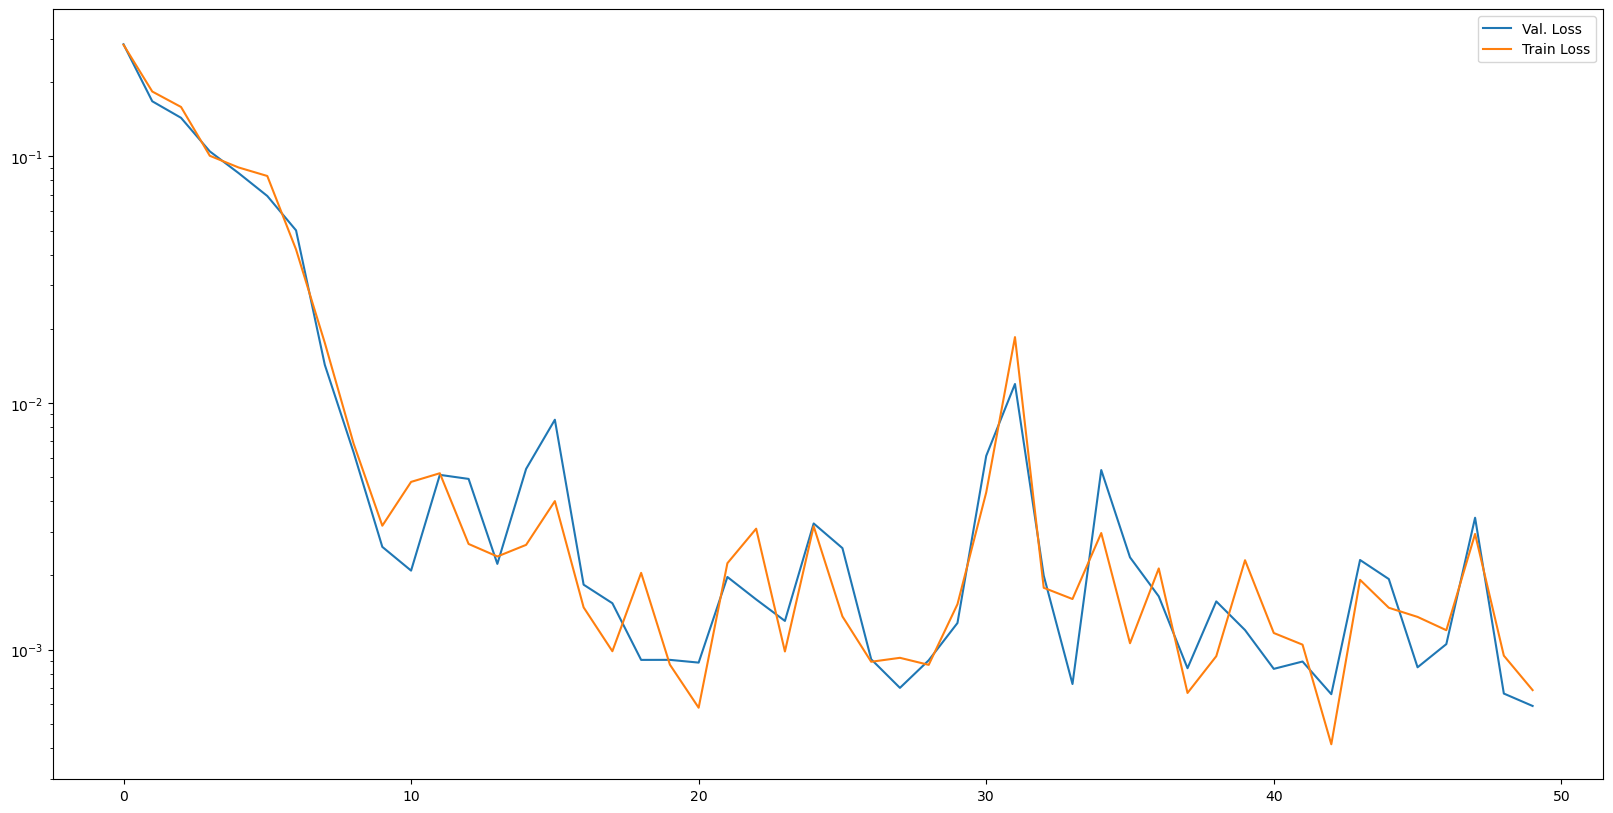

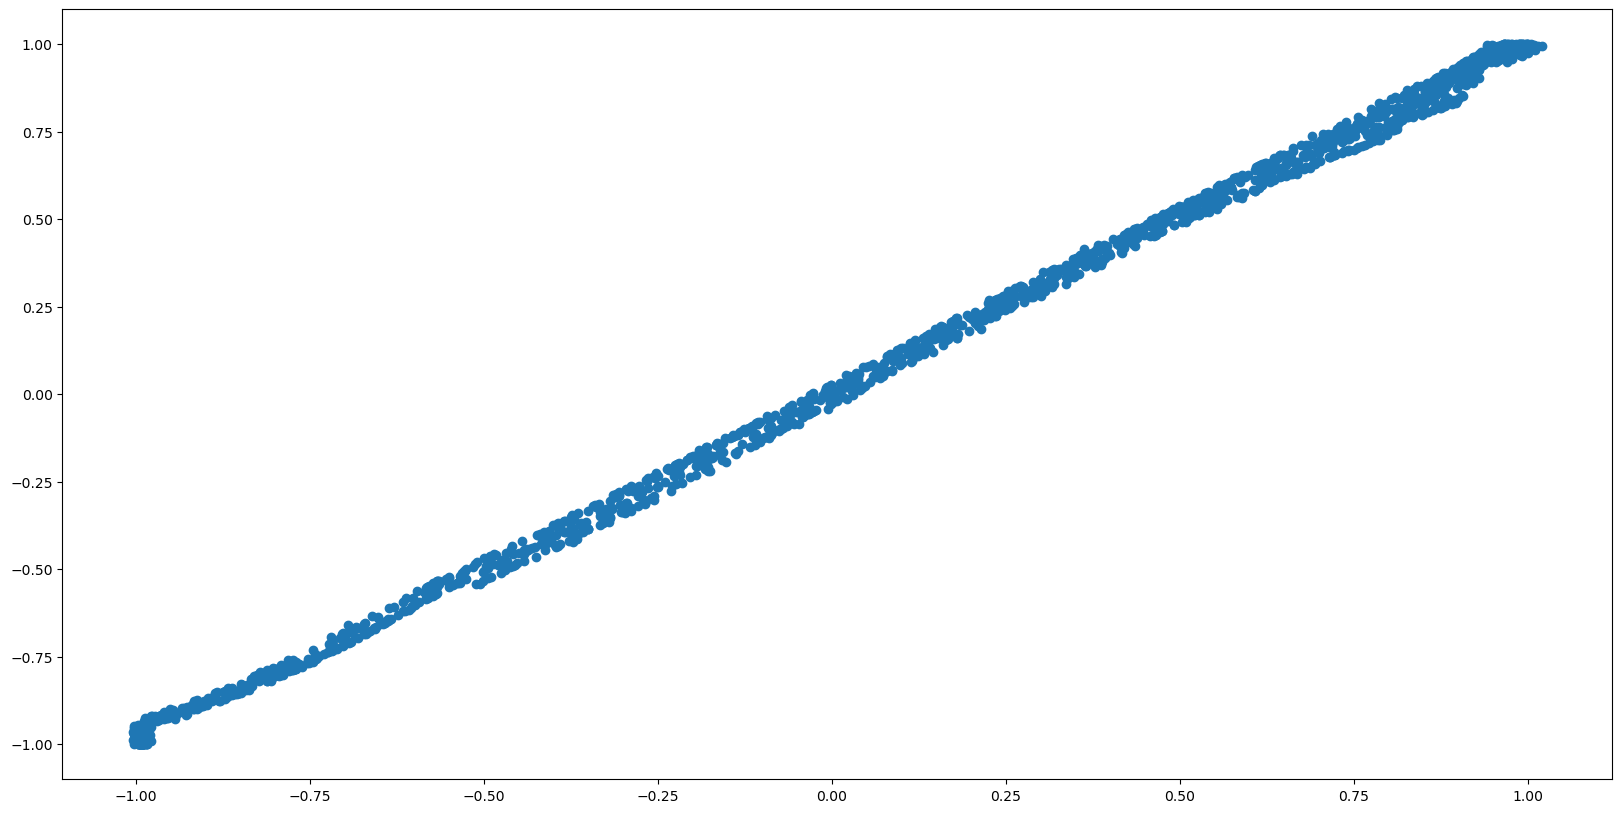

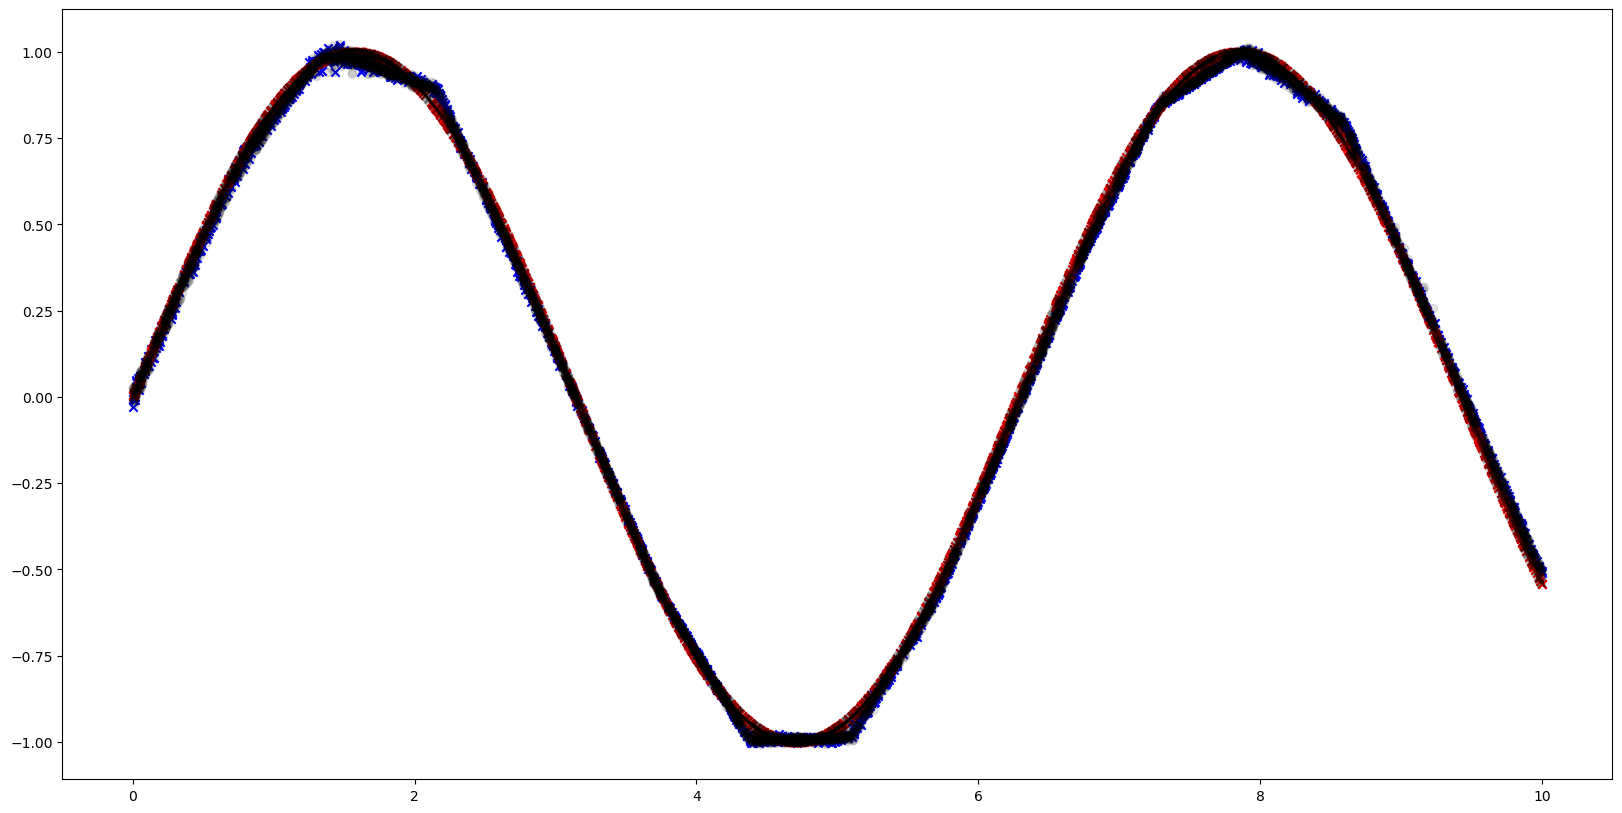

In [107]:
class Sin_model3(torch.nn.Module):

    def __init__(self,):
        super(Sin_model3, self).__init__()
        self.linear_1 = torch.nn.Linear(3, 30) # 3->3
        self.linear_2 = torch.nn.Linear(30, 30) # 3->3

        self.linear_3 = torch.nn.Linear(30, 1) # 3->3   
        self.act=torch.nn.LeakyReLU()
    
    def forward(self, x):
        x = self.linear_1(x)
        x = self.act(x)
        x = self.linear_2(x)
        x = self.act(x)
        x = self.linear_3(x)

        return x

sin_model3=Sin_model3()
fit(sin_model3,train_sin_loader,val_sin_loader,n_epochs=50)

100%|██████████| 50/50 [00:04<00:00, 11.00it/s]


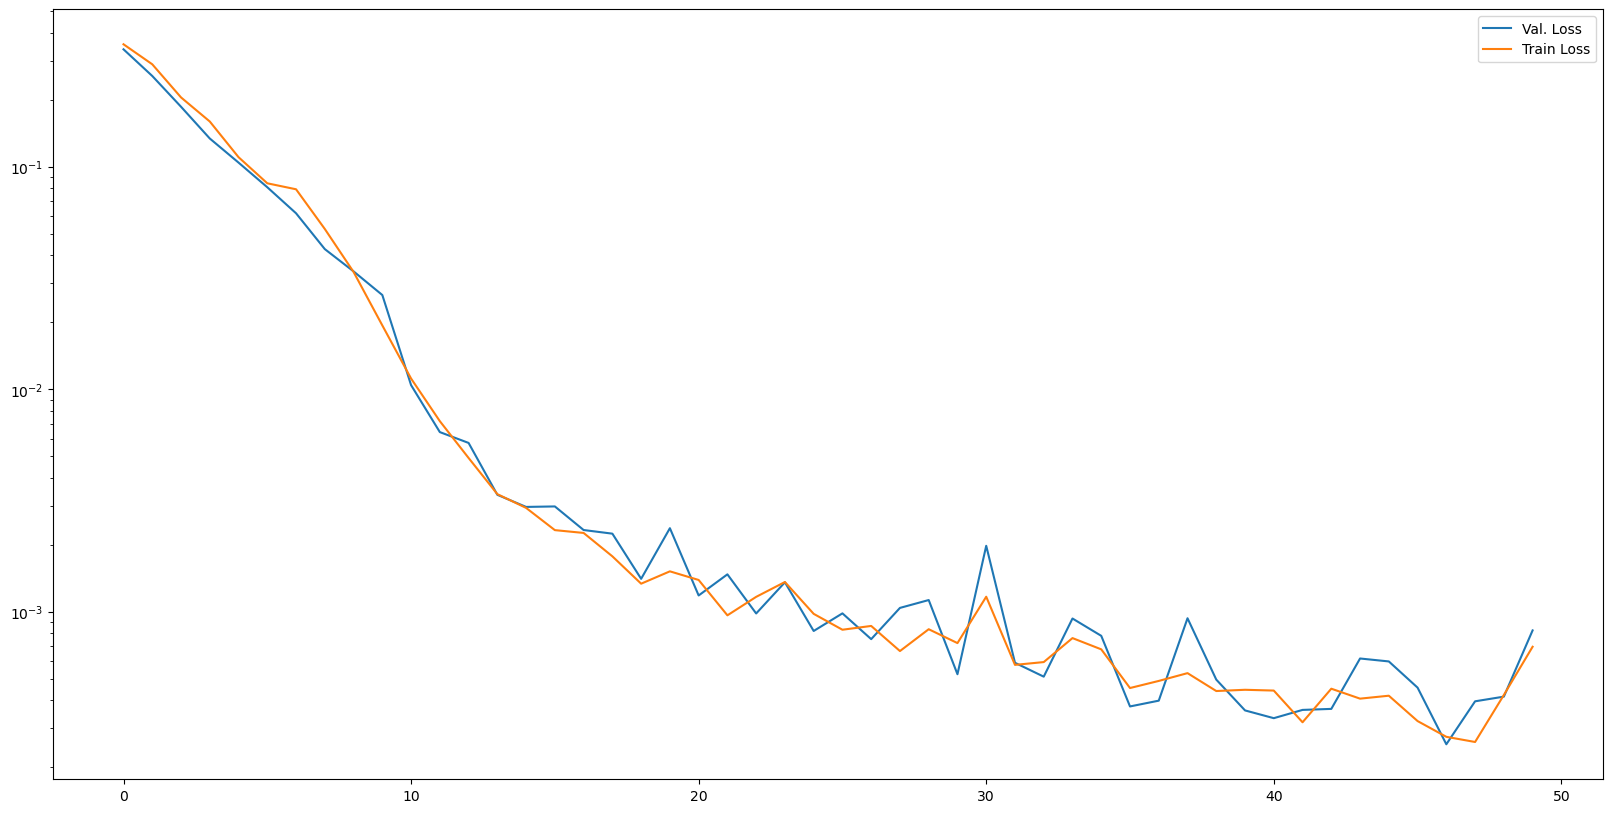

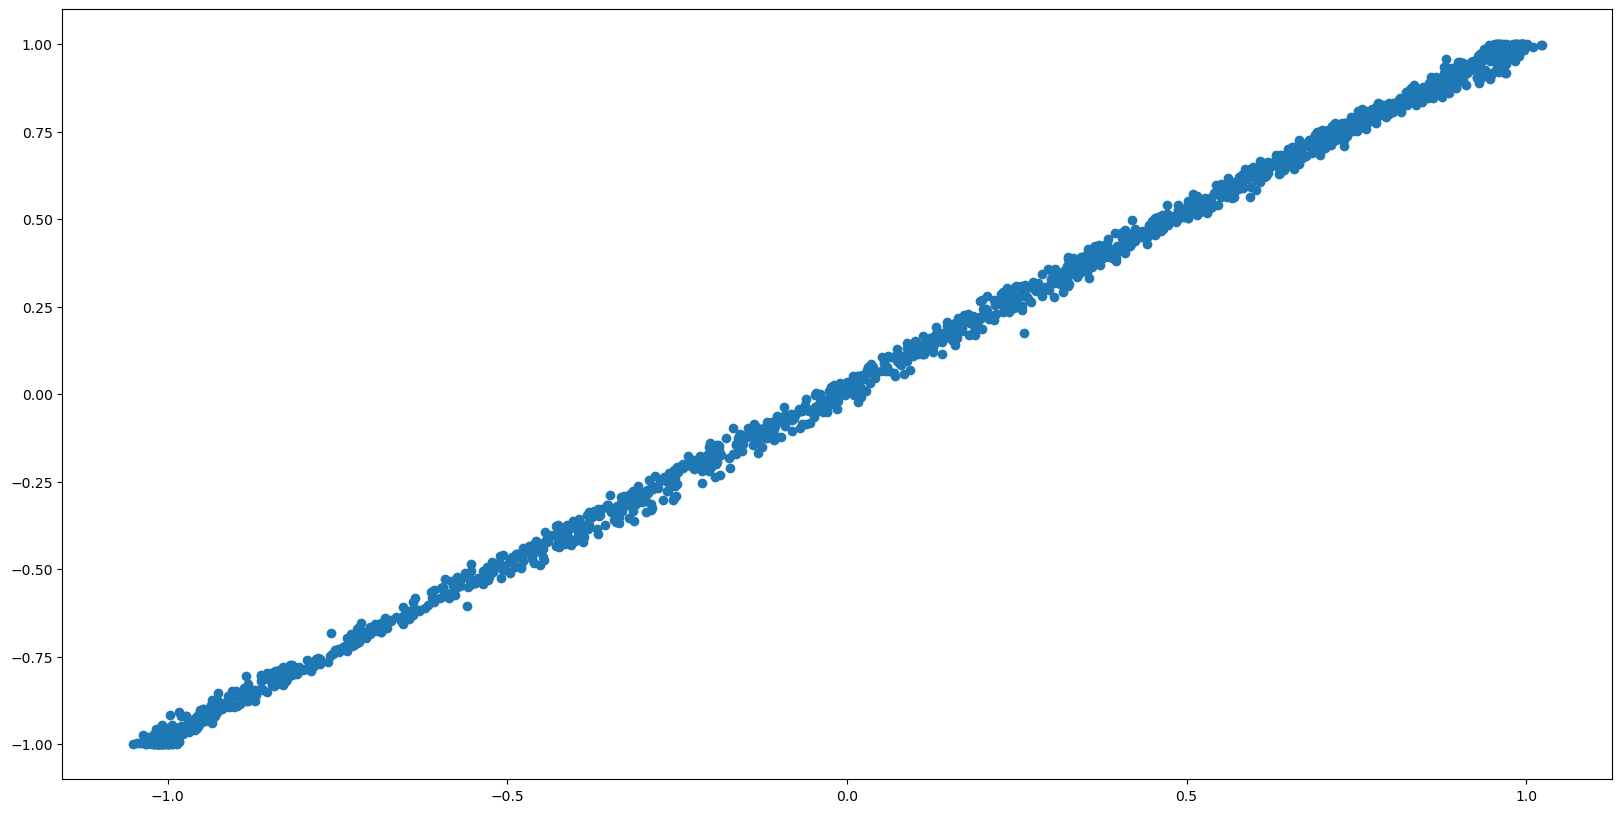

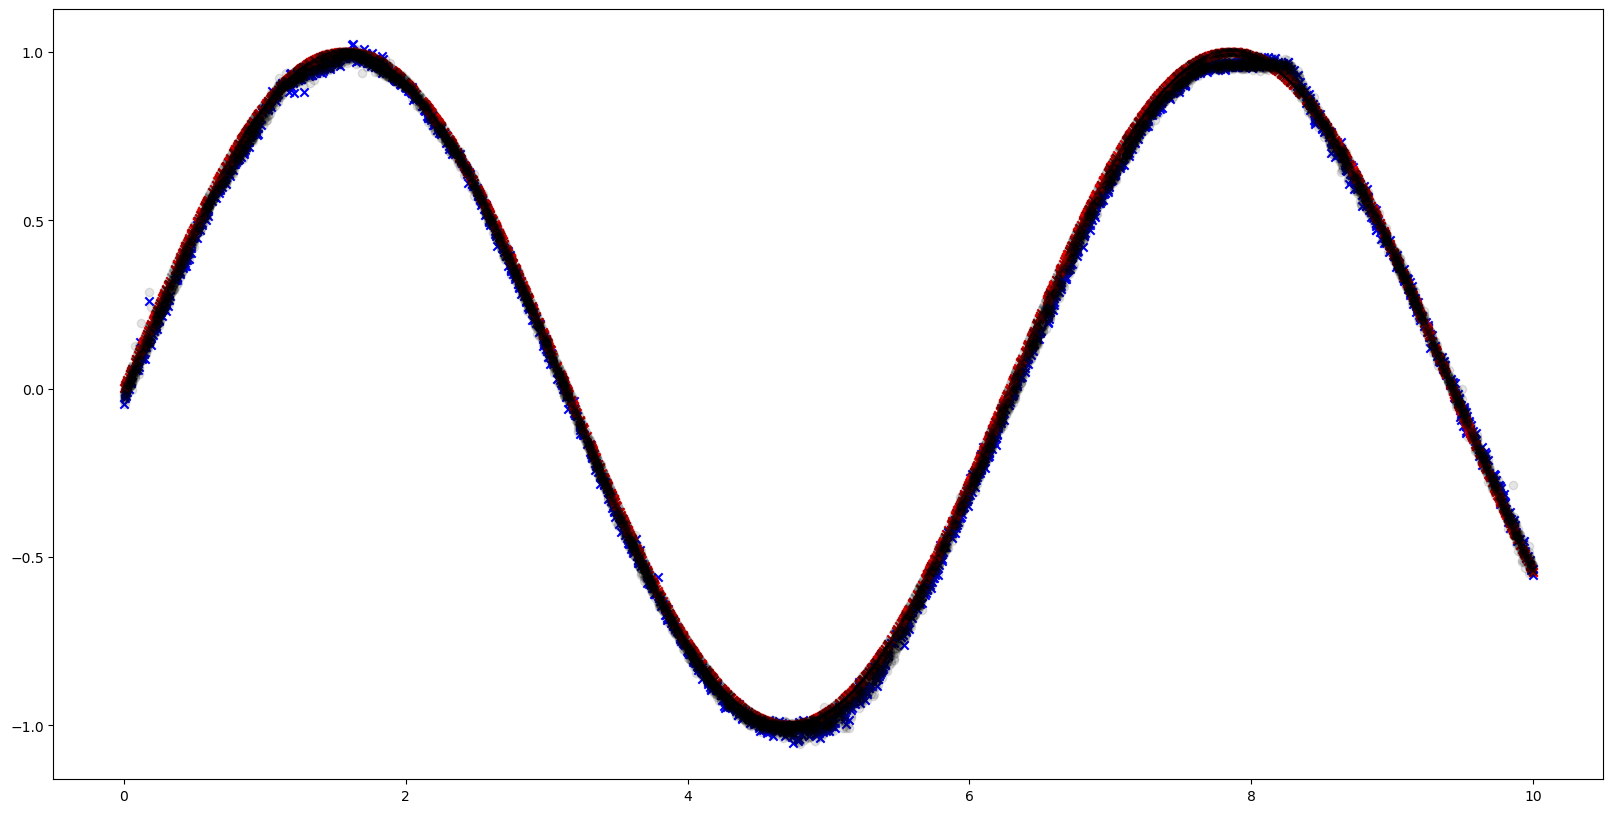

In [108]:
class Sin_model4(torch.nn.Module):

    def __init__(self,):
        super(Sin_model4, self).__init__()
        self.linear_1 = torch.nn.Linear(3, 30) # 3->3
        self.linear_2 = torch.nn.Linear(30, 30) # 3->3
        self.linear_3 = torch.nn.Linear(30, 30) # 3->3
        self.linear_4 = torch.nn.Linear(30, 1) # 3->3   
        self.act=torch.nn.LeakyReLU()
    
    def forward(self, x):
        x = self.linear_1(x)
        x = self.act(x)
        x = self.linear_2(x)
        x = self.act(x)
        x = self.linear_3(x)
        x = self.act(x)
        x = self.linear_4(x)

        return x

sin_model4=Sin_model4()
fit(sin_model4,train_sin_loader,val_sin_loader,n_epochs=50,lr=1e-3)

# 410 Students feel free to skip to the summary below!

# This Section is for the 510 students - Can you make Models that are too good?

This section is for students enrolled in the 510 version of the class to explore on there own. 
* Will investigate overfitting and neural networks
### This is a common image that shows the problems with using a polynomial fit with too many parameters. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Pyplot_overfitting.png/1280px-Pyplot_overfitting.png" width=400px>


 * You'll see if neural networks work the same way.
 * For neural networks we can look at the training curves, below is a badly overfit model with the validation loss being much worse than the training loss.
 * <img src="https://raw.githubusercontent.com/jsearcy1/DNNWS_2022/refs/heads/develop/assets/dropout_0.png" width=400px>



# Use the model code below to answer the questions

100%|██████████| 50/50 [00:02<00:00, 20.21it/s]


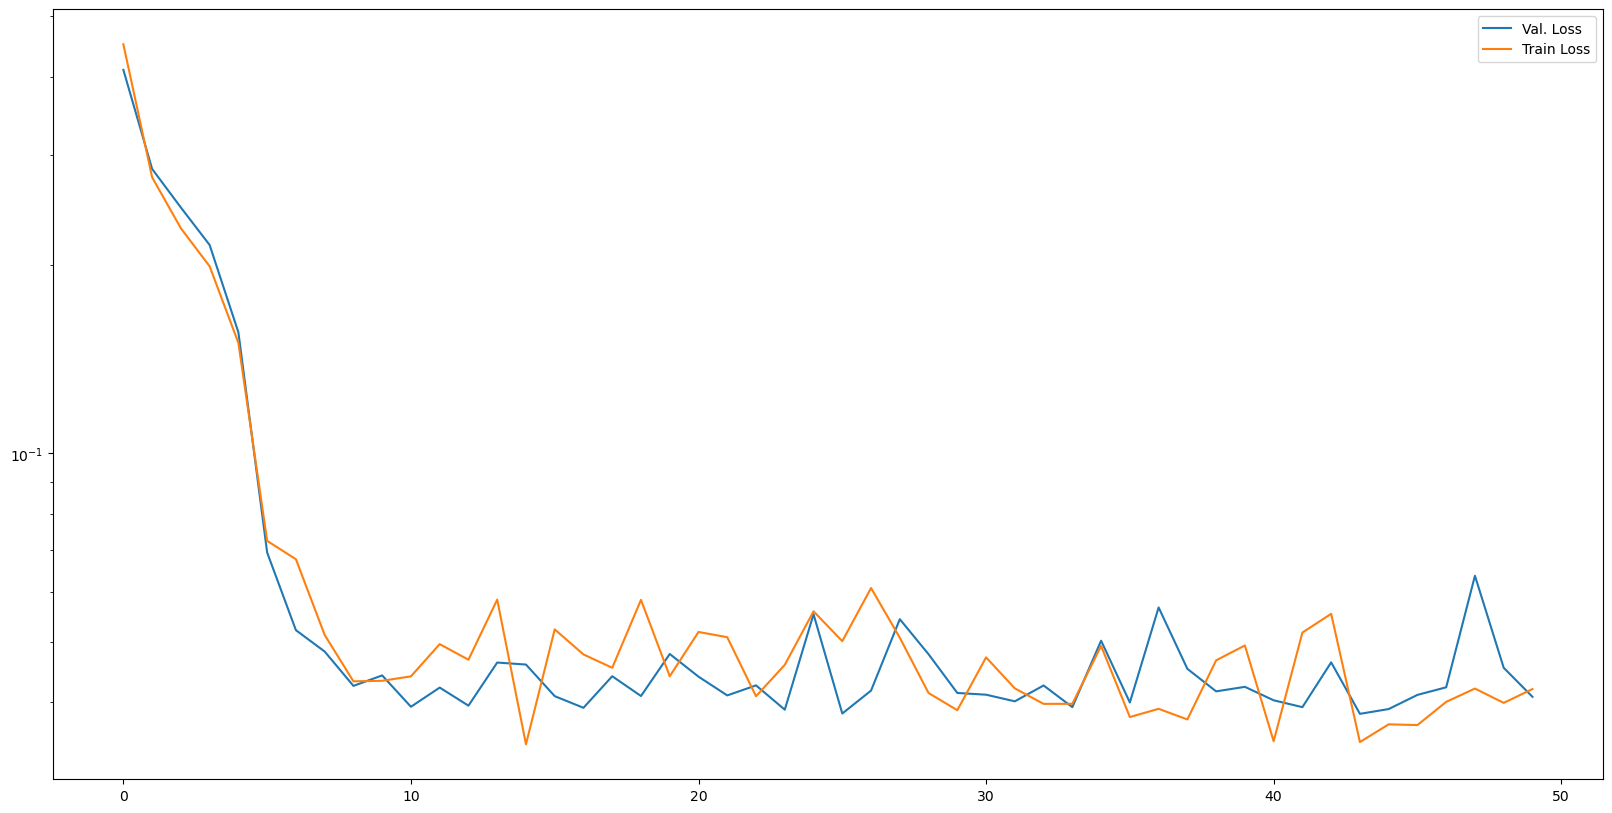

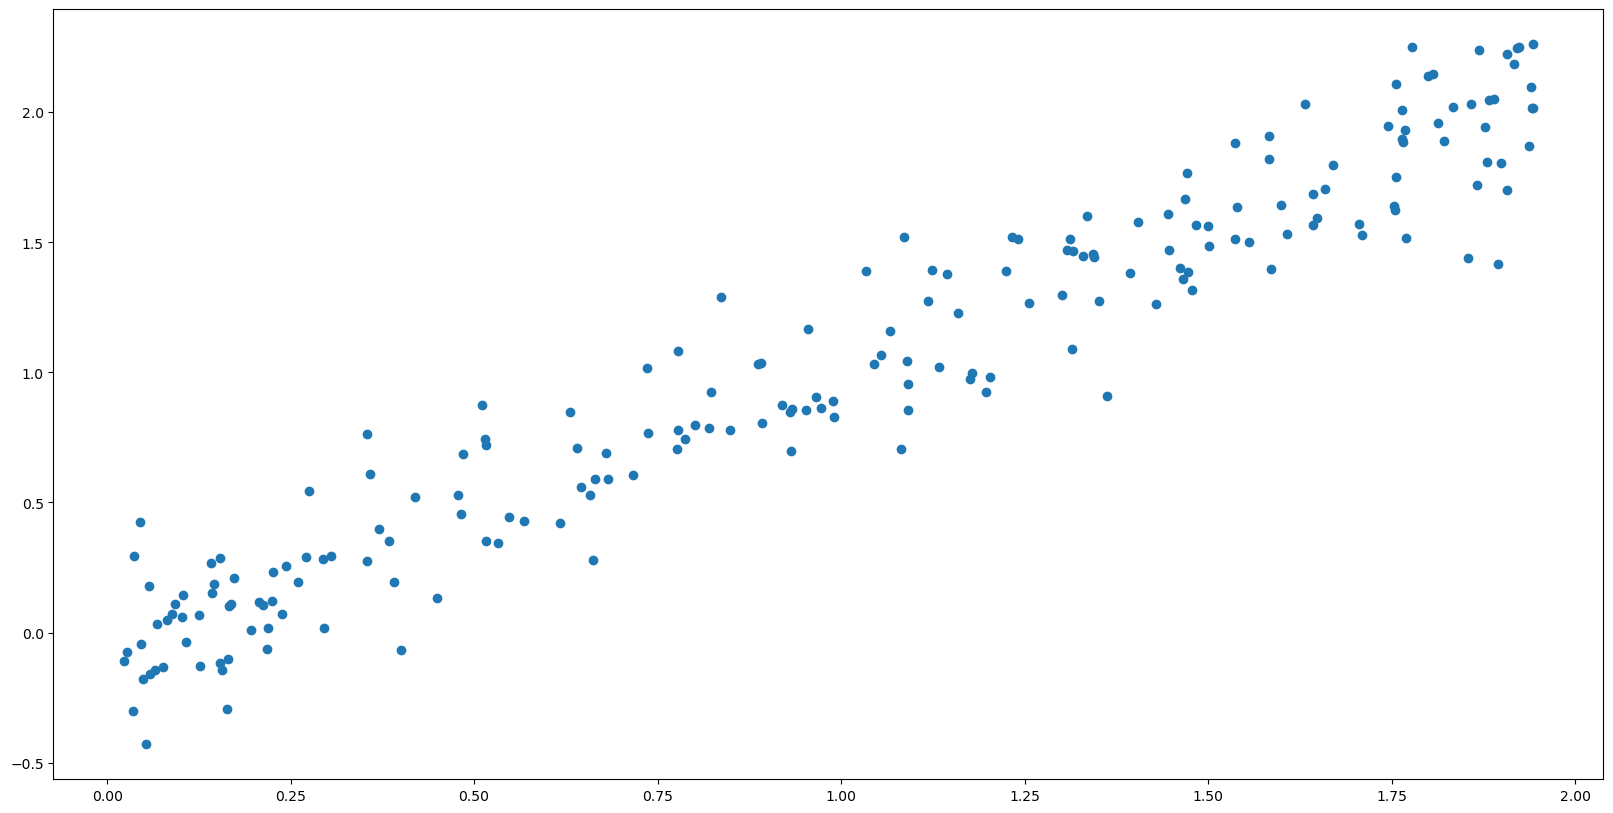

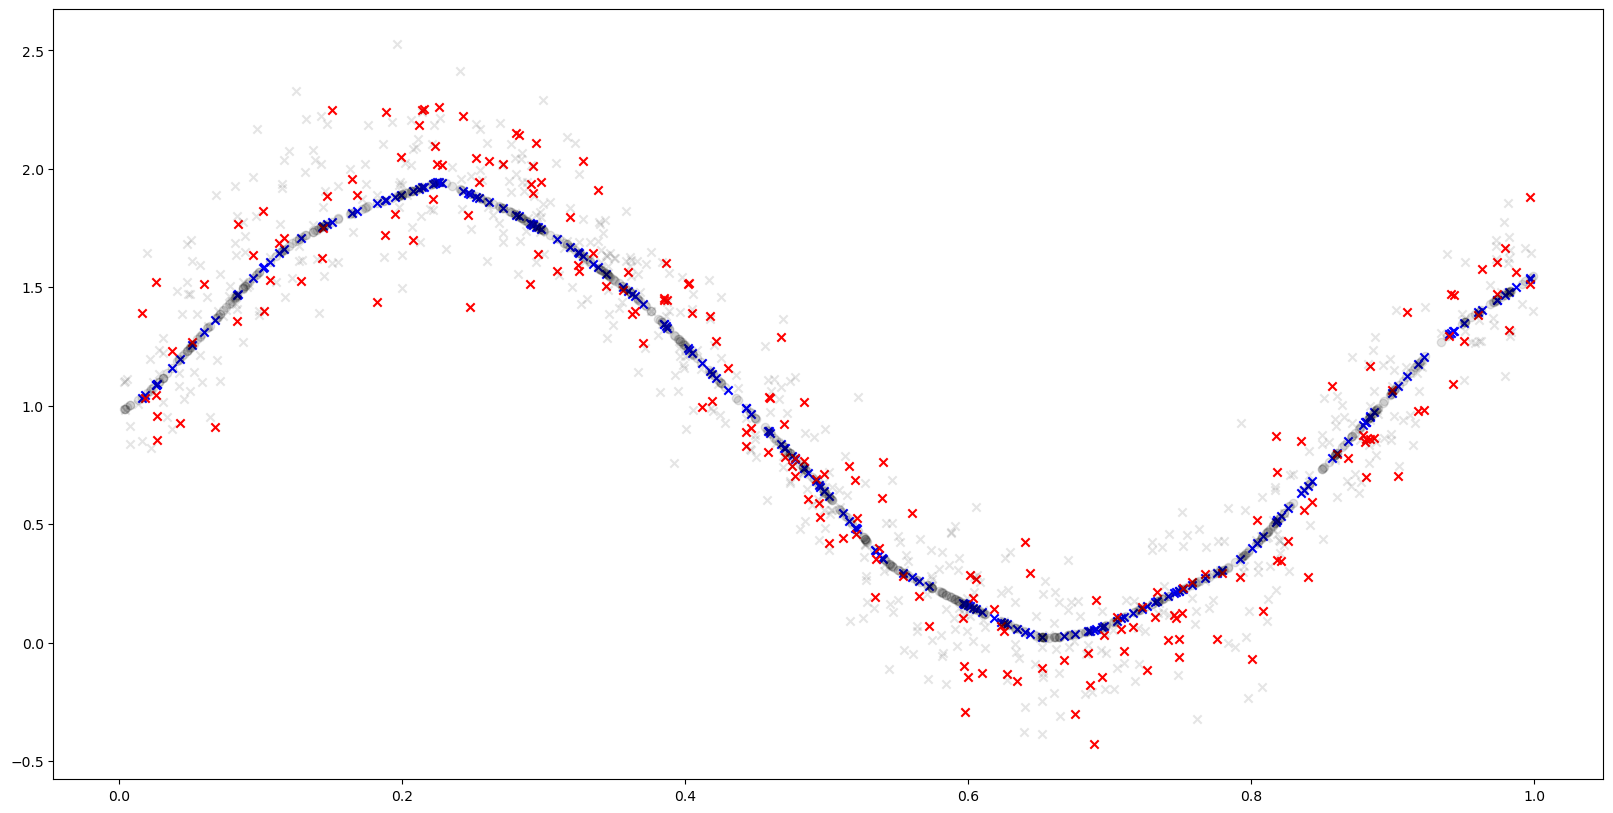

In [127]:

class BigModel(torch.nn.Module):

    def __init__(self,input_size,n_layers,n_hidden):
        super(BigModel, self).__init__()
        
        self.linear_1 = torch.nn.Linear(input_size, n_hidden) # 3->3           
        self.h_layers = torch.nn.ModuleList([torch.nn.Linear(n_hidden, n_hidden) for i in range(n_layers)])
        self.linear_out = torch.nn.Linear(n_hidden, 1) # 3->3   
        self.act=torch.nn.LeakyReLU()
    
    def forward(self, x):
        x = self.linear_1(x)
        x = self.act(x)
        for l in self.h_layers:
            x=l(x)
            x=self.act(x)
        x = self.linear_out(x)
        return x


def build_dataset(data_dim,n_points,noise_std,batch_size=32):
    x=torch.rand(size=(n_points,data_dim))
    y= torch.sin(7*x[:,0])+torch.randn(n_points)*noise_std+1
    dataset=TensorDataset(x,y)

    train_size = int(0.6 * len(dataset))
    val_size = int(0.2 * len(dataset))
    test_size = len(dataset) - train_size - val_size

    train_dataset, val_dataset,test_dataset = random_split(dataset, [train_size, val_size,test_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    return train_loader,val_loader
    
data_dim=1

train_loader,val_loader=build_dataset(n_points=1000,data_dim=data_dim,noise_std=0.2,batch_size=10)
my_model=BigModel(input_size=data_dim,n_layers=3,n_hidden=50)
fit(my_model,train_loader,val_loader,n_epochs=50,lr=1e-3)

# Q. Can training too long lead to over fitting? (Try training for longer and longer with the parameters above)

Try training for a large number of epochs, and answer the question above based on the result

100%|██████████| 1/1 [00:00<00:00, 19.04it/s]


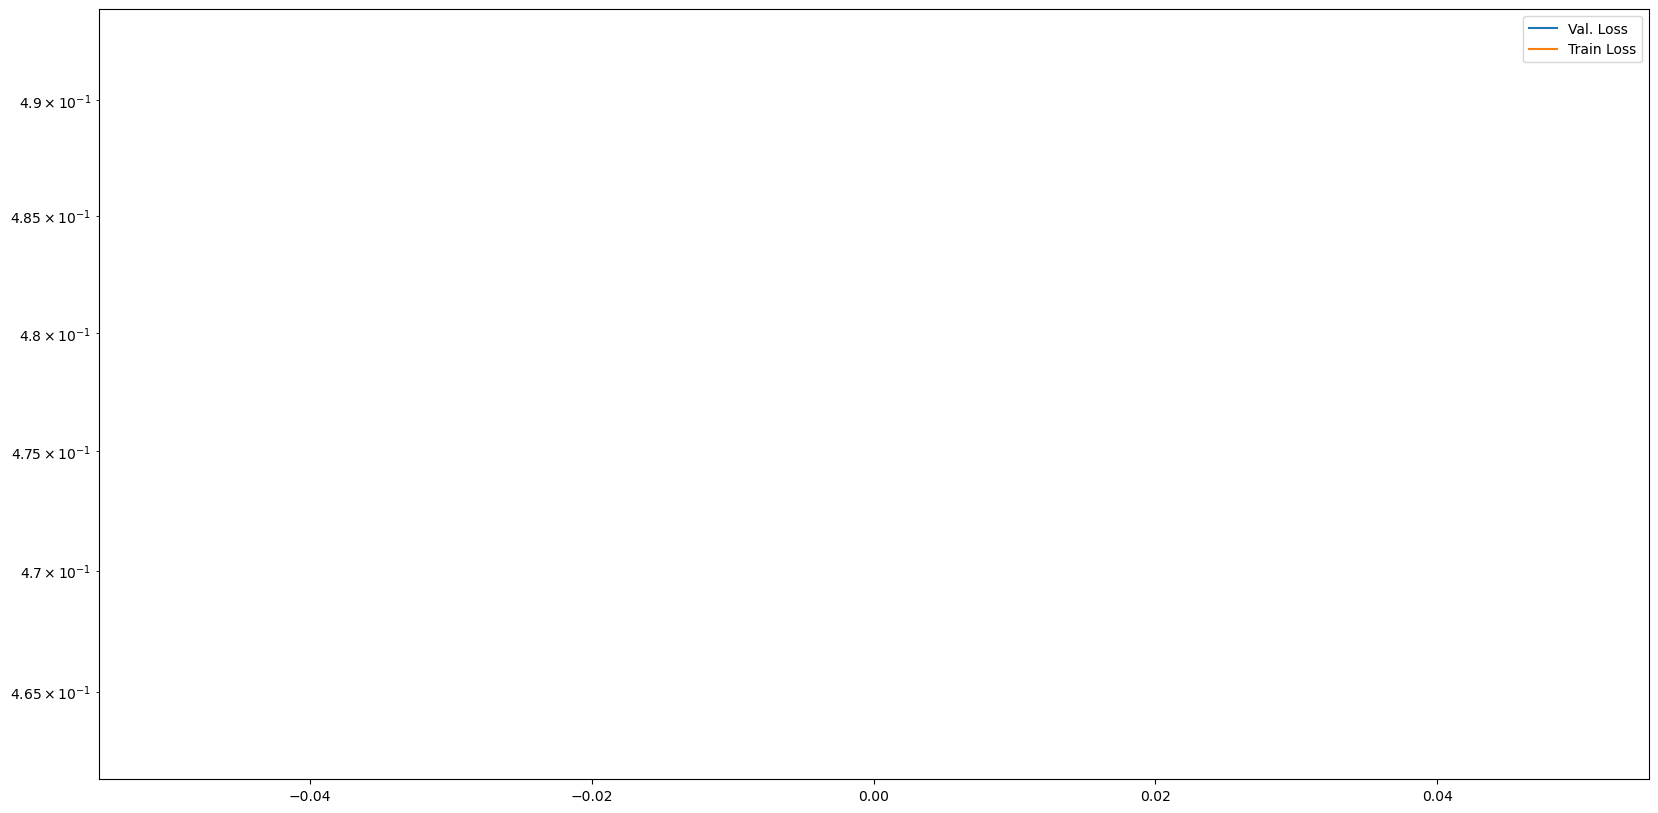

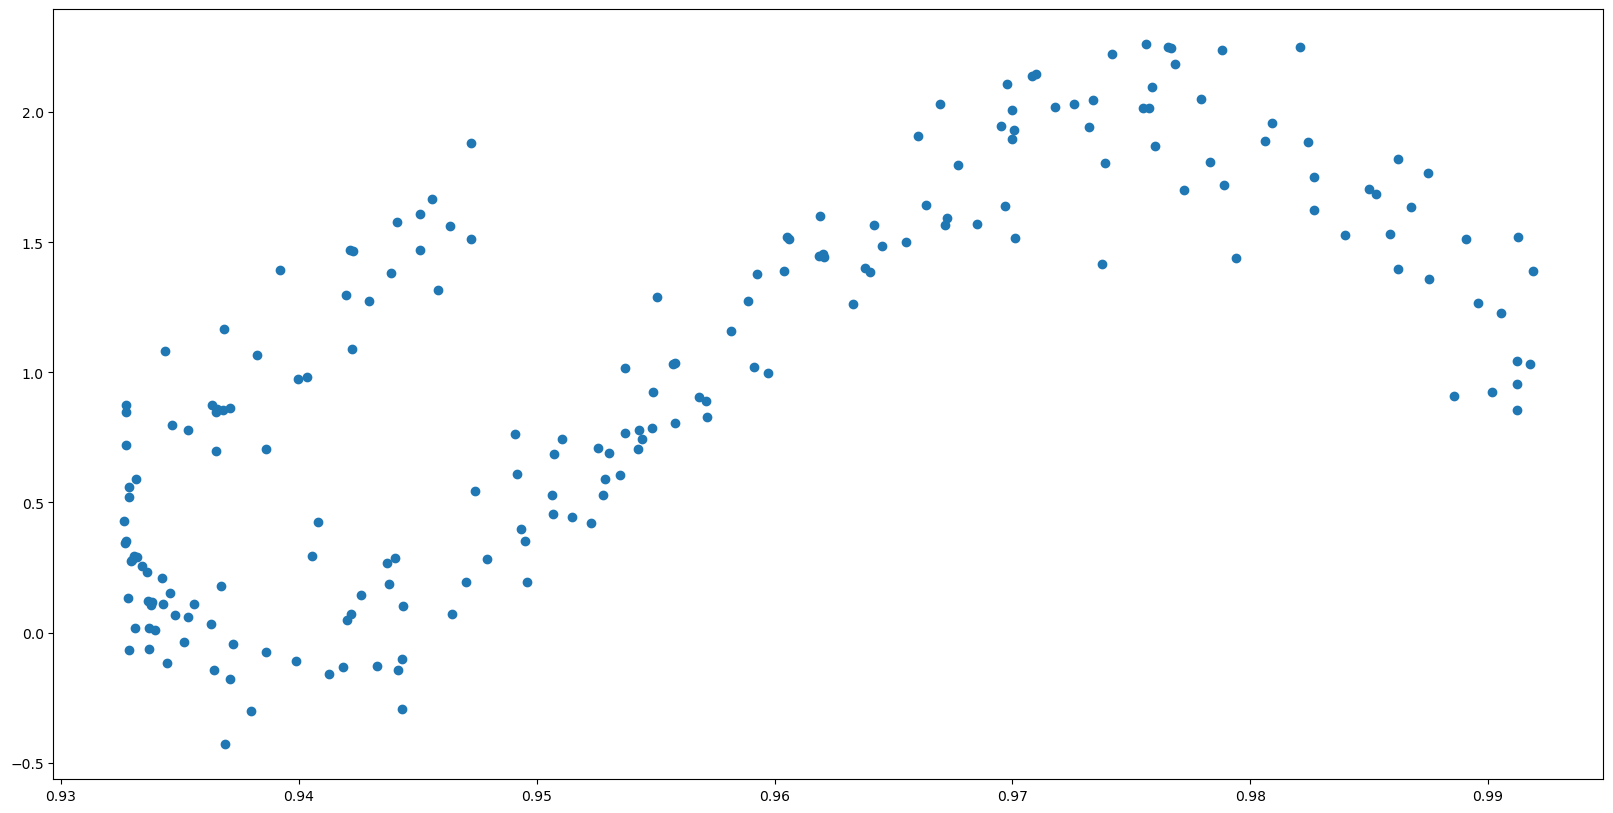

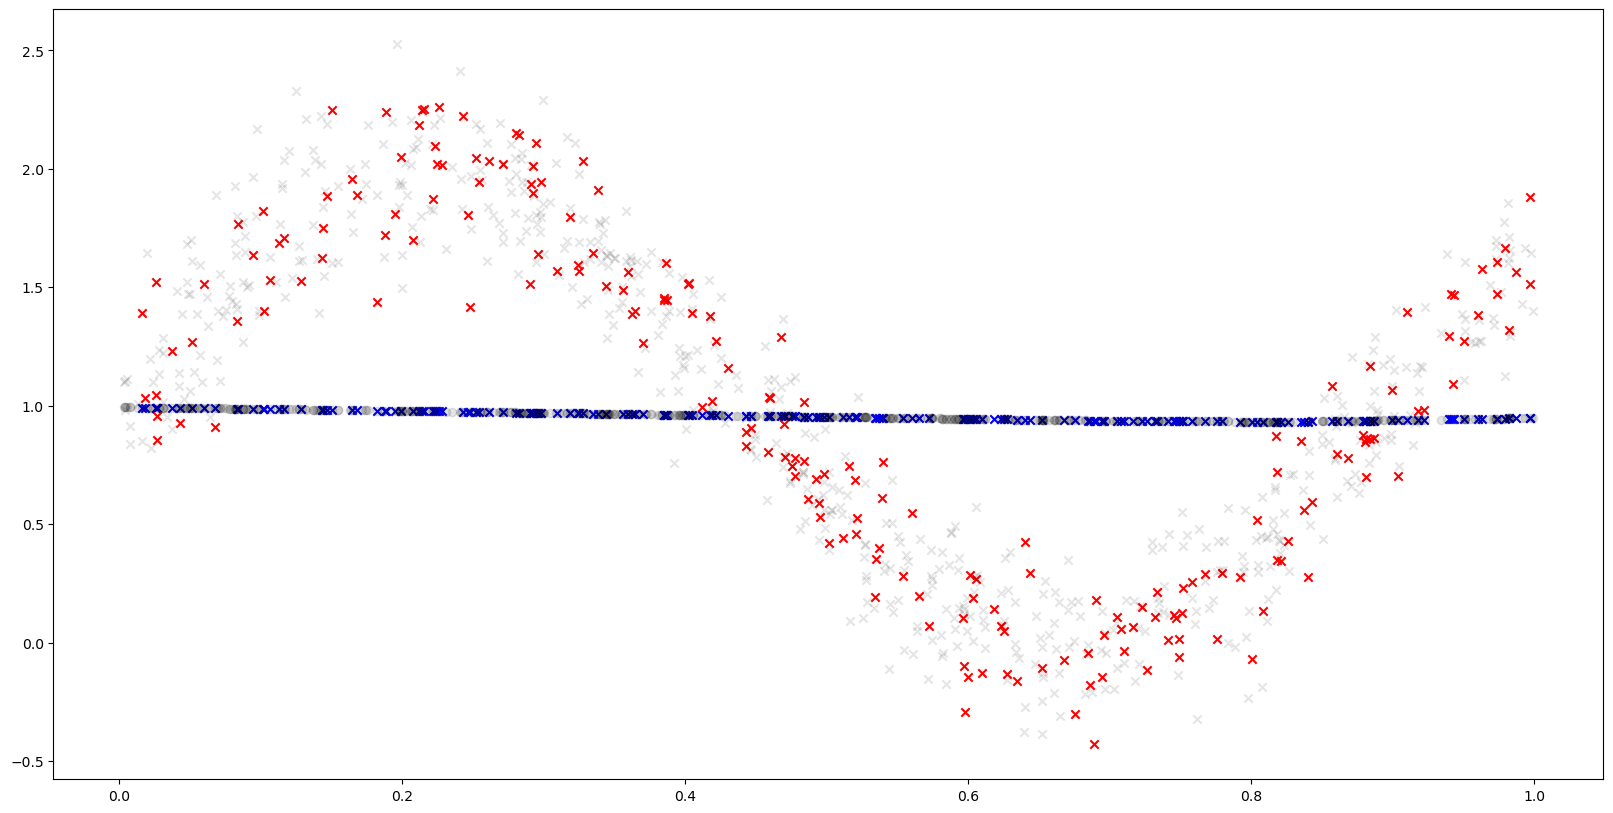

In [128]:
data_dim=1
my_model=BigModel(input_size=data_dim,n_layers=3,n_hidden=50)

fit(my_model,train_loader,val_loader,n_epochs=1,lr=1e-3)

In [129]:
"Answer the above question here"

'Answer the above question here'

# Q. Can making your model too big lead to over fitting?

Try training with a larger number of hidden neurons and layers will do you see any overfitting?
**Note***: make sure your model still converges, if it dosen't try something smaller. 

In [130]:
data_dim=10
my_model=BigModel(input_size=data_dim,n_layers=5,n_hidden=10)
fit(my_model,train_loader,val_loader,n_epochs=10,lr=1e-3)

  0%|          | 0/10 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x1 and 10x10)

In [ ]:
"Answer the above question here"

# Q. How does changing the data_dim (adding more un-informative features) affect overfitting
Try training with different values for data_dim how does this change overfitting, does it change your answer to the last question?

In [ ]:
data_dim=10
my_model=BigModel(input_size=data_dim,n_layers=3,n_hidden=50)
train_loader,val_loader=build_dataset(n_points=5000,data_dim=data_dim,noise_std=0.2,batch_size=10)
fit(my_model,train_loader,val_loader,n_epochs=50,lr=1e-3)

In [ ]:
"Answer the above Question here"

# Q. How does changing the amount of data you have effect overfitting and model convergnce.
Try to see how little data you can train with, and how much it takes to prevent overfitting if any was seen in the last problem. Use the same data_dim that you used in your last experiment

 



In [ ]:
data_dim=10
my_model=BigModel(input_size=data_dim,n_layers=3,n_hidden=50)
train_loader,val_loader=build_dataset(n_points=100,data_dim=data_dim,noise_std=0.2,batch_size=10)
fit(my_model,train_loader,val_loader,n_epochs=100,lr=1e-3)

my_model=BigModel(input_size=data_dim,n_layers=3,n_hidden=50)
train_loader,val_loader=build_dataset(n_points=10000,data_dim=data_dim,noise_std=0.2,batch_size=10)
fit(my_model,train_loader,val_loader,n_epochs=100,lr=1e-3)



In [ ]:
"Answer the above Question here"

# Vocab Review
**Hyper Parmeter** Anything that goes into the model number layers, number of units..., or model fit learning rates, optimizers, etc.

**batch size**: The number of examples seen when doing gradient decent 

**epoch**: The number of times the entire dataset has been used (selected in batch sized chunks)

**learning rate**: Controls the distance of each gradient step

**optimizer**: Algorithm that (using the learning rate) decides on how big a gradient step to take
  * sgd
  * adam
  * rmsprop



#  Model Design
* Input dimension is defined by the input data
* Output dimension is defined by target data
* Hidden layers add complexity to the model
    * More hidden layers or larger hidden layer dimensions can represent more complicated functions
    * Too many layers can be hard to train without special tricks
        * Can overfit, or fail to train (more on that later)
    * Too few layers may not correctly describe the data
* The right balance depends on the problem
    * Roughly the more data the more layers you can use
    * The more complex the target the more layers you'll need
* No right answer feel free to experiment